In [1]:
import os
import scanpy as sc
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
from anndata import AnnData
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.patches import Ellipse
import matplotlib.gridspec as gridspec
import gseapy as gp
import matplotlib.cm as cm
from glimmer.model import train_neighbor_weights, set_seed
from glimmer.utils import spatial_smooth, plot_logbarrier_curve, run_logbarrier_weight

warnings.filterwarnings('ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
%config InlineBackend.figure_format = 'retina' 

In [2]:
# Set path
main_path = '/data/qiyu/spatialRegion/'
fig_path = main_path + 'figures/SVG/'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = 'DejaVu Sans'
dir = main_path + 'data/slidetag/slidetag_mm1_ee/' 

# 1. Run Glimmer with list of log barriers

In [3]:
seed = 42
log_barrier_list = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60, 
                    100, 300, 600, 1000, 3000, 6000, 10000]
save_path = dir + 'adata_log_barrier.h5ad'

In [22]:
set_seed(seed)
if os.path.exists(save_path):
    print('Loading adata')
    adata = sc.read_h5ad(save_path)
else:
    adata = sc.read_h5ad(os.path.join(dir, 'rna_adata.h5ad'))
    sc.pp.normalize_total(adata, target_sum=1e4) 
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, n_top_genes=3000)
    sc.tl.pca(adata, svd_solver='arpack', n_comps=50)

    # RNA only
    sc.pp.neighbors(adata, use_rep='X_pca', random_state=seed)
    sc.tl.umap(adata, random_state=seed)
    adata.obsm["umap_RNA_only"] = adata.obsm['X_umap']

    # RNA + list of spatial weight
    adata = run_logbarrier_weight(adata, k=50, log_barrier_list=log_barrier_list, seed=seed)
    adata.write_h5ad(save_path)

Sweeping log_barrier:   5%|▌         | 1/19 [00:45<13:38, 45.47s/it]

log_barrier = 0.01     mean = 0.3100    std = 0.0257  


Sweeping log_barrier:  11%|█         | 2/19 [01:17<10:40, 37.69s/it]

log_barrier = 0.03     mean = 0.3113    std = 0.0259  


Sweeping log_barrier:  16%|█▌        | 3/19 [01:48<09:15, 34.71s/it]

log_barrier = 0.06     mean = 0.3114    std = 0.0259  


Sweeping log_barrier:  21%|██        | 4/19 [02:19<08:15, 33.00s/it]

log_barrier = 0.1      mean = 0.3114    std = 0.0259  


Sweeping log_barrier:  26%|██▋       | 5/19 [02:51<07:40, 32.89s/it]

log_barrier = 0.3      mean = 0.3115    std = 0.0258  


Sweeping log_barrier:  32%|███▏      | 6/19 [03:27<07:17, 33.64s/it]

log_barrier = 0.6      mean = 0.3118    std = 0.0258  


Sweeping log_barrier:  37%|███▋      | 7/19 [03:59<06:39, 33.32s/it]

log_barrier = 1        mean = 0.3122    std = 0.0259  


Sweeping log_barrier:  42%|████▏     | 8/19 [04:33<06:07, 33.37s/it]

log_barrier = 3        mean = 0.3147    std = 0.0264  


Sweeping log_barrier:  47%|████▋     | 9/19 [05:04<05:27, 32.73s/it]

log_barrier = 6        mean = 0.3193    std = 0.0279  


Sweeping log_barrier:  53%|█████▎    | 10/19 [05:36<04:53, 32.63s/it]

log_barrier = 10       mean = 0.3269    std = 0.0314  


Sweeping log_barrier:  58%|█████▊    | 11/19 [06:22<04:53, 36.74s/it]

log_barrier = 30       mean = 0.3672    std = 0.0472  


Sweeping log_barrier:  63%|██████▎   | 12/19 [06:53<04:04, 34.97s/it]

log_barrier = 60       mean = 0.4206    std = 0.0532  


Sweeping log_barrier:  68%|██████▊   | 13/19 [07:25<03:23, 33.87s/it]

log_barrier = 1e+02    mean = 0.4805    std = 0.0576  


Sweeping log_barrier:  74%|███████▎  | 14/19 [07:58<02:49, 33.83s/it]

log_barrier = 3e+02    mean = 0.6617    std = 0.0373  


Sweeping log_barrier:  79%|███████▉  | 15/19 [08:36<02:19, 34.85s/it]

log_barrier = 6e+02    mean = 0.6912    std = 0.0262  


Sweeping log_barrier:  84%|████████▍ | 16/19 [09:11<01:44, 34.85s/it]

log_barrier = 1e+03    mean = 0.6918    std = 0.0262  


Sweeping log_barrier:  89%|████████▉ | 17/19 [09:43<01:08, 34.20s/it]

log_barrier = 3e+03    mean = 0.6922    std = 0.0261  


Sweeping log_barrier:  95%|█████████▍| 18/19 [10:17<00:33, 33.99s/it]

log_barrier = 6e+03    mean = 0.6923    std = 0.0261  


Sweeping log_barrier: 100%|██████████| 19/19 [10:48<00:00, 34.12s/it]

log_barrier = 1e+04    mean = 0.6923    std = 0.0261  


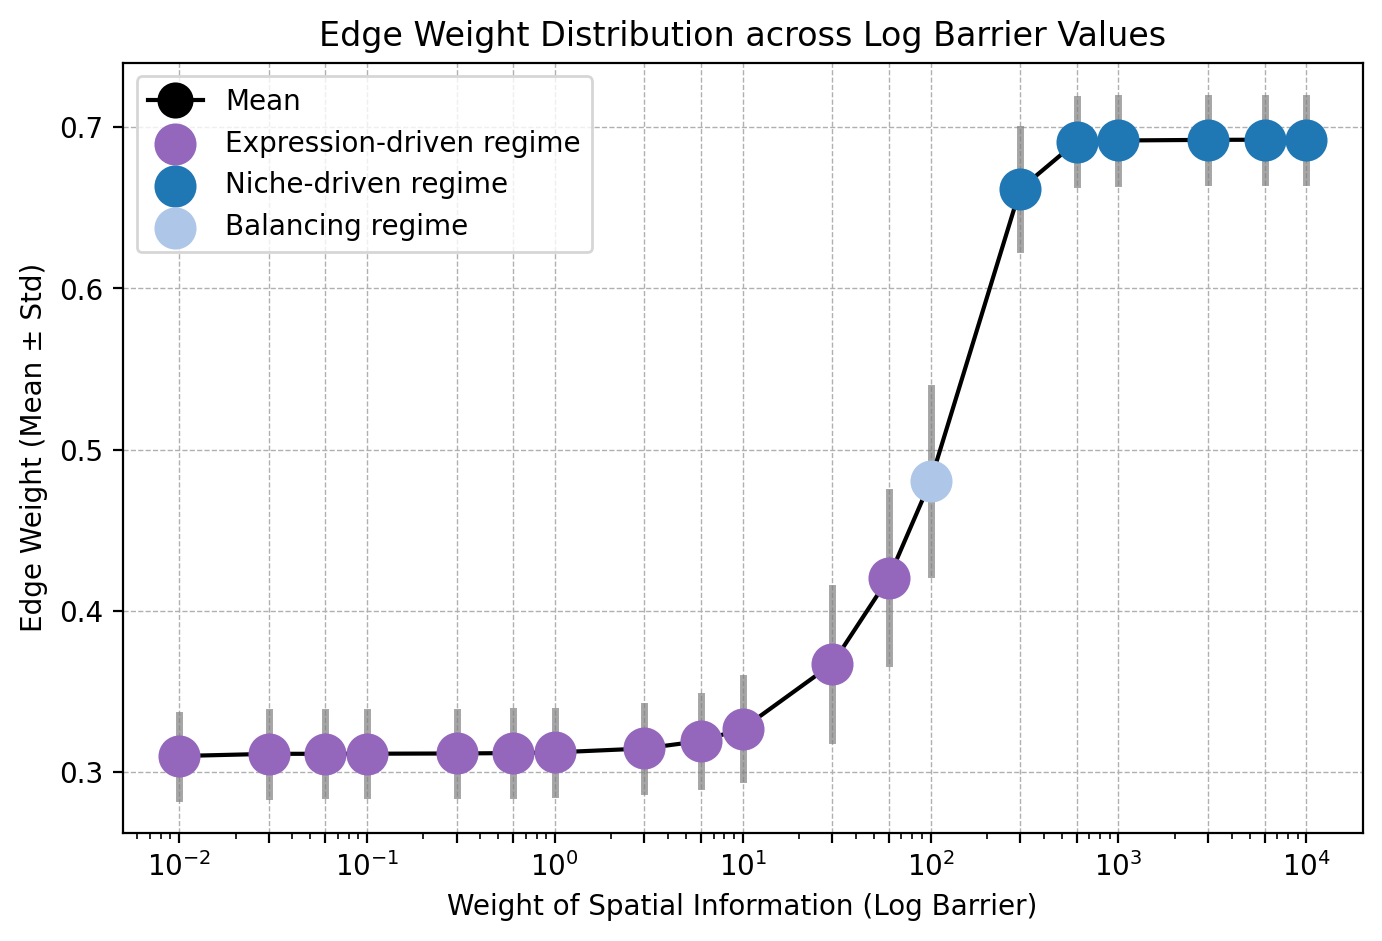

In [5]:
# Plot 
fig, ax = plot_logbarrier_curve(adata, log_barrier_list, figsize=(8, 5)) 
handles, labels = ax.get_legend_handles_labels()
label_mapping = {
    'cellular': 'Expression-driven regime',
    'transitional': 'Balancing regime',
    'regional': 'Niche-driven regime'
}
ax.legend(handles, [label_mapping.get(label, label) for label in labels])
plt.show()

log_barrier: 10 | Weight mean: 0.3269, std: 0.0314
log_barrier: 100 | Weight mean: 0.4805, std: 0.0576
log_barrier: 1000 | Weight mean: 0.6918, std: 0.0262


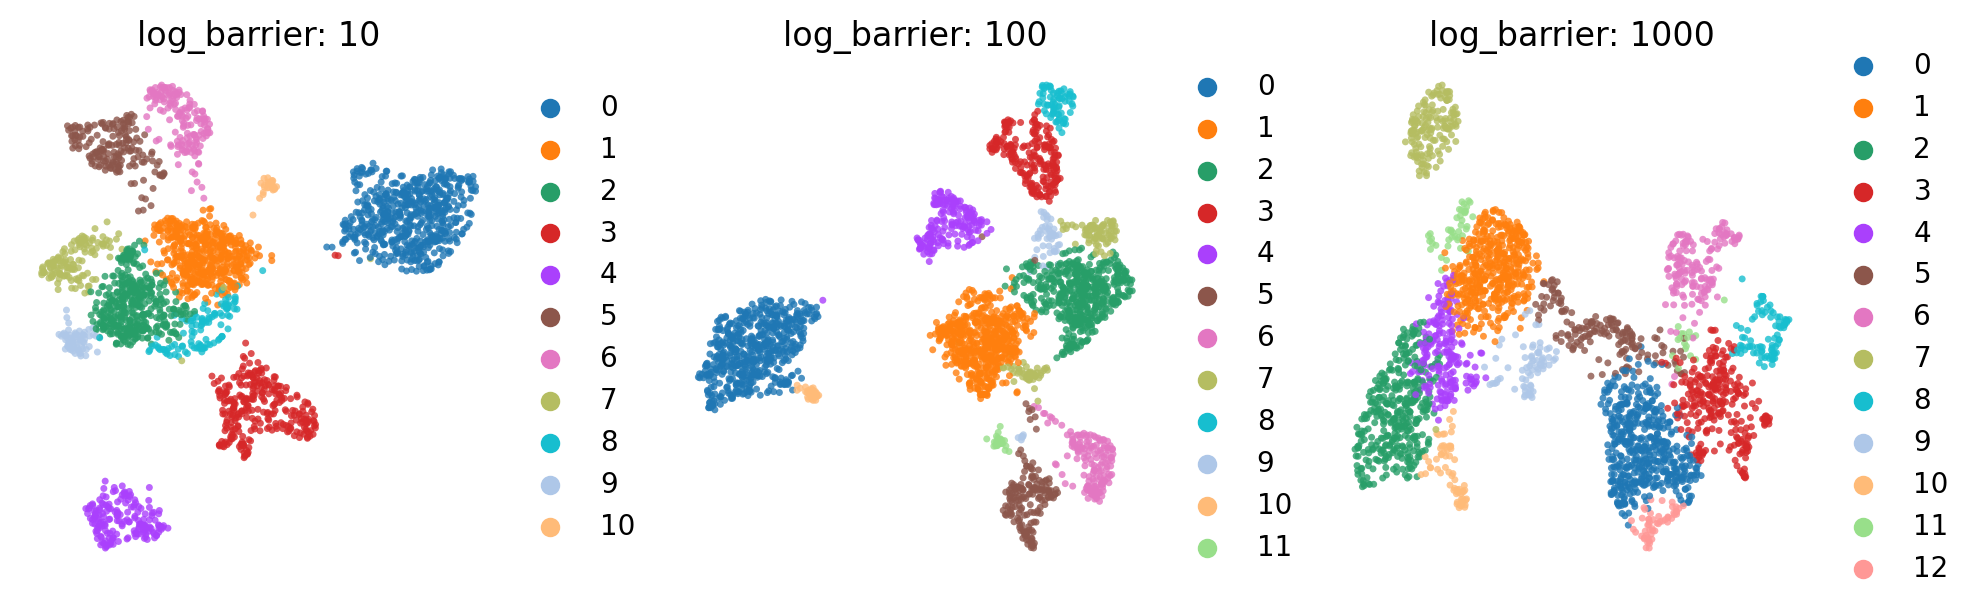

In [24]:
lbs = [10, 100, 1000]
res = 0.8
save_embeddings = False
def remove_spines(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

adata = sc.read_h5ad(save_path)
fig, axes = plt.subplots(1, len(lbs), figsize=(10, 3.2))
for i, lb in enumerate(lbs):
    print(
        f"log_barrier: {lb} | Weight mean: {adata.obs[f'Weight_{lb}'].mean():.4f}, "
        f"std: {adata.obs[f'Weight_{lb}'].std():.4f}"
    )
    umap_key = f"X_umap_sp_{lb}"
    leiden_key = f"leiden_sp_{lb}"
    neighbors_key = f'neighbors_{lb}'
    if umap_key not in adata.obsm or leiden_key not in adata.obs:
        sc.pp.neighbors(adata, use_rep=f'emb_smooth_{lb}', key_added=neighbors_key, random_state=seed)
        sc.tl.umap(adata, neighbors_key=neighbors_key)
        adata.obsm[umap_key] = adata.obsm['X_umap'].copy()
        sc.tl.leiden(adata, resolution=res, key_added=f'leiden_{lb}', neighbors_key=neighbors_key, random_state=seed)
        adata = spatial_smooth(adata, label_key=f'leiden_{lb}', emb_key=f'emb_smooth_{lb}')
        adata.obs[leiden_key] = adata.obs[f'leiden_{lb}']
    sc.pl.embedding(adata, basis=umap_key, color=leiden_key, s=25, alpha=0.8, title=f"log_barrier: {lb}", ax=axes[i], show=False)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    remove_spines(axes[i])
if save_embeddings is True:
    adata.write_h5ad(save_path)
plt.tight_layout()
plt.show()

In [26]:
adata.obs['cell_type_rename'] = adata.obs['cell_type'].replace({
    "T_reg": "Regulatory T Cells",
    "T_CD8": "CD8+ T Cells",
    "T_CD4": "CD4+ T Cells",
    "mono-mac": "Monocytes/Macrophages",
    "myeloid": "Myeloid",
    "mDC": "mDC",
    "pDC": "pDC",
    "plasma": "Plasma",
    "tumour_1": "Tumor 1",
    "tumour_2": "Tumor 2",
})

celltype_order = [
    "CD4+ T Cells",
    "CD8+ T Cells",
    "Regulatory T Cells",
    "Monocytes/Macrophages",
    "Myeloid",
    "mDC",
    "pDC",
    "Plasma",
    "Tumor 1",
    "Tumor 2"
]
adata.obs['cell_type_rename'] = pd.Categorical(
    adata.obs['cell_type_rename'],
    categories=celltype_order,
    ordered=True
)

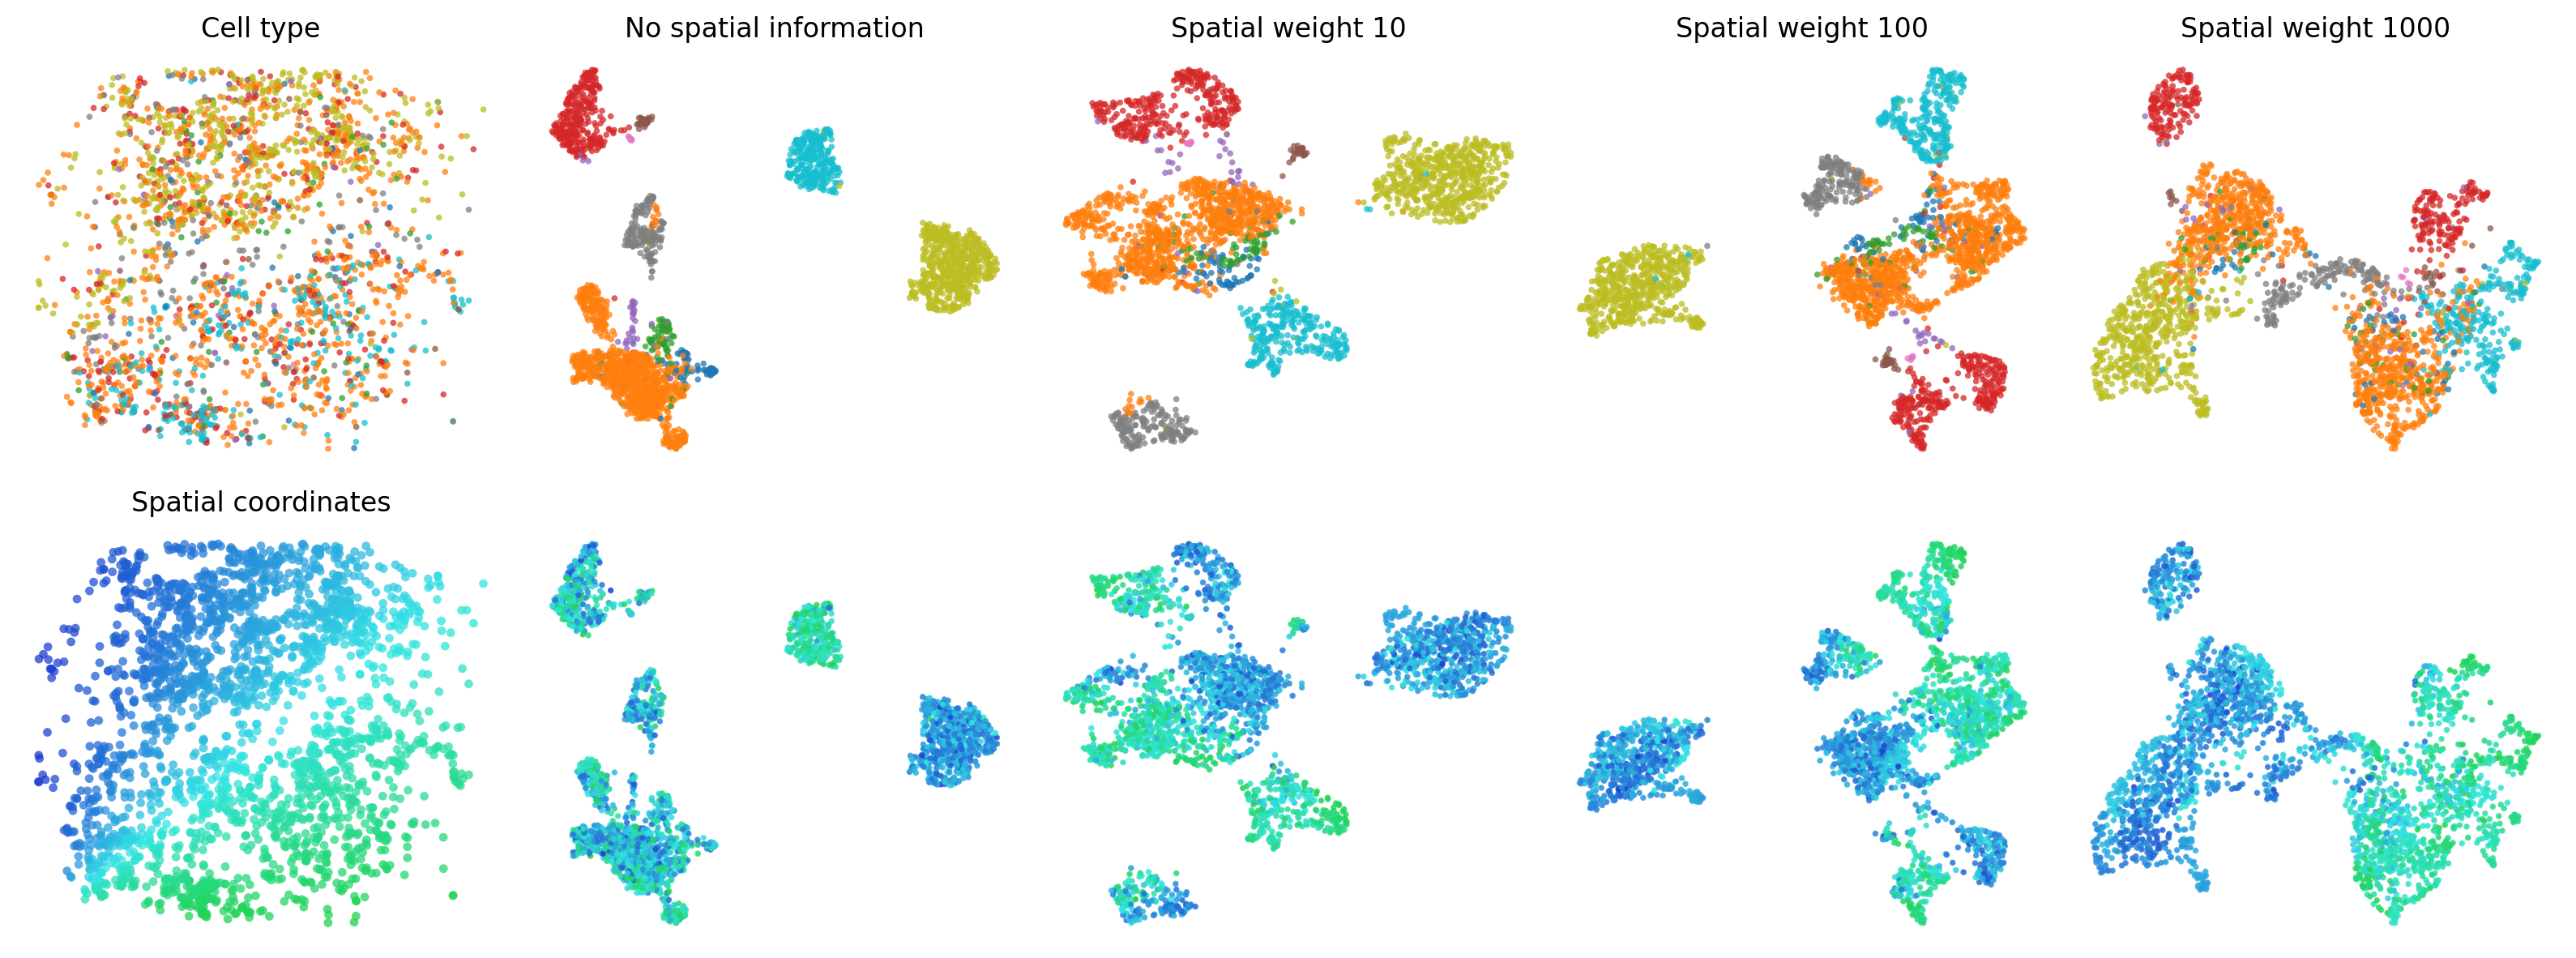

In [16]:
color_key = "cell_type_rename"
region_key = "region"
fig_name = fig_path + 'figure2/fig2_m_slidetag_melanoma_combined_lb3.svg'
s = 3
alpha = 0.75

# Ensure Scanpy uses default colors
if f"{color_key}_colors" in adata.uns:
    del adata.uns[f"{color_key}_colors"]

# spatial RGB
coord = adata.obsm['spatial']
x = coord[:, 0] - np.min(coord[:, 0])
y = coord[:, 1] - np.min(coord[:, 1])
angles = np.arctan2(y, x)
angles = (angles + np.pi) / (2.1 * np.pi)
colors = cm.gist_rainbow(angles)[:, :3]
colors = np.clip(np.power(colors, 1.5), 0, 1)
gray = np.mean(colors, axis=1, keepdims=True)
colors = 0.7 * colors + 0.3 * gray

# Plot
n_cols = len(lbs) + 2
fig, axes = plt.subplots(2, n_cols, figsize=(3.2 * n_cols, 6))
sc.pl.embedding(adata, basis='spatial', color=color_key, title='Cell type',
                ax=axes[0, 0], show=False, legend_loc=None, s=s*10, alpha=alpha)
axes[0, 0].set_xlabel("")
axes[0, 0].set_ylabel("")
remove_spines(axes[0, 0])

# (1,0): spatial RGB
axes[1, 0].scatter(coord[:, 0], coord[:, 1], c=colors, s=s*5, edgecolors='none', alpha=alpha)
axes[1, 0].set_title('Spatial coordinates')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('')
axes[1, 0].set_xticks([])
axes[1, 0].set_yticks([])
remove_spines(axes[1, 0])

# (0,1): RNA-only UMAP (Scanpy default color)
sc.pl.embedding(adata, basis='umap_RNA_only', color=color_key, title='No spatial information',
                ax=axes[0, 1], show=False, legend_loc=None, s=s*10, alpha=alpha)
axes[0, 1].set_xlabel("")
axes[0, 1].set_ylabel("")
remove_spines(axes[0, 1])

# (1,1): RNA-only UMAP + RGB color
embedding = adata.obsm['umap_RNA_only']
axes[1, 1].scatter(embedding[:, 0], embedding[:, 1], c=colors, s=s, alpha=alpha)
axes[1, 1].set_xticks([])
axes[1, 1].set_yticks([])
axes[1, 1].set_xlabel("")
axes[1, 1].set_ylabel("")
axes[1, 1].set_title("")
remove_spines(axes[1, 1])

# log_barrier embeddings
for i, log_barrier in enumerate(lbs):
    col = i + 2
    emb_key = f"X_umap_sp_{log_barrier}"
    sc.pl.embedding(adata, basis=emb_key, color=color_key, legend_loc=None, s=s*10,
                    ax=axes[0, col], show=False, title=f'Spatial weight {log_barrier}', alpha=alpha)
    axes[0, col].set_xlabel("")
    axes[0, col].set_ylabel("")
    remove_spines(axes[0, col])
    embedding = adata.obsm[emb_key]
    axes[1, col].scatter(embedding[:, 0], embedding[:, 1], c=colors, s=s, alpha=alpha)
    axes[1, col].set_xticks([])
    axes[1, col].set_yticks([])
    axes[1, col].set_xlabel("")
    axes[1, col].set_ylabel("")
    axes[1, col].set_title("")
    remove_spines(axes[1, col])
plt.tight_layout()
plt.savefig(fig_name, format="svg", bbox_inches="tight")
plt.show() 

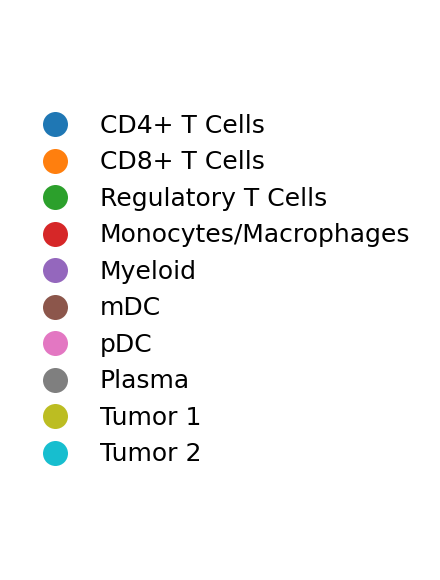

In [19]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

color_key = "cell_type_rename"
fig_name = fig_path + 'figure2/fig2_m_slidetag_melanoma_combined_lb3_legend.svg'
categories = celltype_order
colors = adata.uns[color_key + "_colors"]
handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=cat)
    for i, cat in enumerate(categories)
]
fig, ax = plt.subplots(figsize=(2, 3))
ax.legend(handles=handles, loc='center', frameon=False, fontsize=9)
ax.axis('off')
plt.tight_layout()
plt.savefig(fig_name, format="svg", bbox_inches="tight")
plt.show()

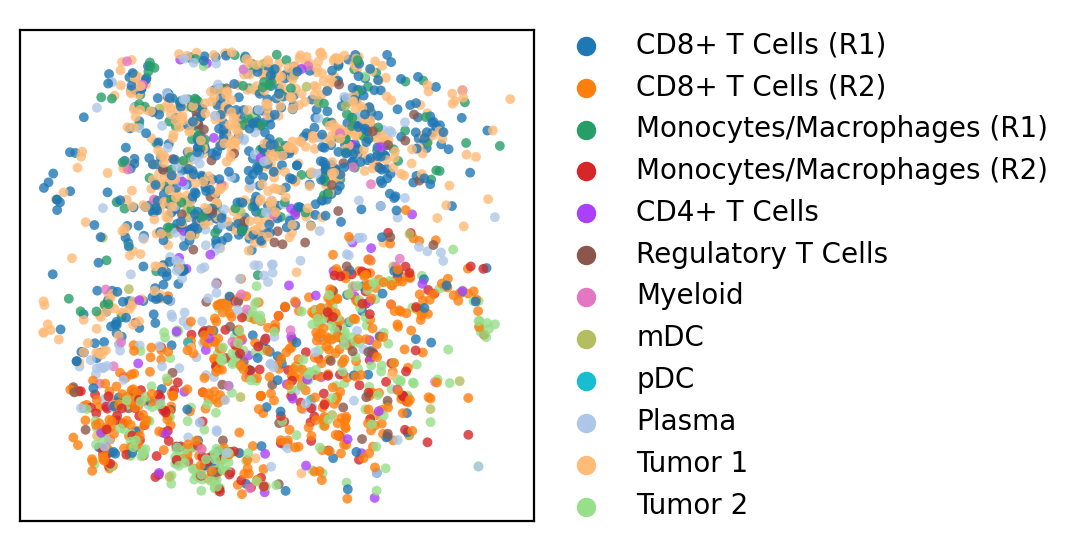

In [53]:
new_col = "cell_type_refined"
new_labels = [
    "CD8+ T Cells (R1)", "CD8+ T Cells (R2)",
    "Monocytes/Macrophages (R1)", "Monocytes/Macrophages (R2)"
]
rules = [
    (("CD8+ T Cells", ['2', '7', '9']), "CD8+ T Cells (R2)"),
    (("CD8+ T Cells", ['1', '7']), "CD8+ T Cells (R1)"),
    (("Monocytes/Macrophages", ['6']), "Monocytes/Macrophages (R1)"),
    (("Monocytes/Macrophages", ['5']), "Monocytes/Macrophages (R2)"),
]
fig_name = fig_path + 'figure2/fig2_m_slidetag_melanoma_celltype_refined_spatial_spw100.svg'

adata.obs[new_col] = adata.obs[color_key].copy().astype("category")
adata.obs[new_col] = adata.obs[new_col].cat.add_categories(new_labels)
for (ctype, clusters), new_label in rules:
    mask = (adata.obs[color_key] == ctype) & (adata.obs['leiden_sp_100'].isin(clusters))
    adata.obs.loc[mask, new_col] = new_label

unwanted_mask = (adata.obs[color_key].isin(["CD8+ T Cells", "Monocytes/Macrophages"])) & \
                (~adata.obs[new_col].isin(new_labels))
adata = adata[~unwanted_mask].copy()
adata.obs[new_col] = adata.obs[new_col].cat.remove_unused_categories()

desired_order = [
    "CD8+ T Cells (R1)",
    "CD8+ T Cells (R2)",
    "Monocytes/Macrophages (R1)",
    "Monocytes/Macrophages (R2)",
    "CD4+ T Cells",
    "Regulatory T Cells",
    "Myeloid",
    "mDC",
    "pDC",
    "Plasma",
    "Tumor 1",
    "Tumor 2"
]
adata.obs[new_col] = adata.obs[new_col].cat.reorder_categories(desired_order, ordered=False)

fig, ax = plt.subplots(figsize=(5.5, 3))  
sc.pl.embedding(adata, basis='spatial', color=new_col, title='', s=50, alpha=0.8, show=False, ax=ax)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
plt.savefig(fig_name, format="svg", bbox_inches="tight")
plt.show()

# 2. CD8 T Cell subsets

In [5]:
adata_tcells_path = os.path.join(dir, 'adata_tcells.h5ad')
if not os.path.exists(adata_tcells_path):
    # Subset T_CD8 cells
    adata_raw = sc.read_h5ad(os.path.join(dir, 'rna_adata.h5ad'))
    adata_raw.obs['region_name'] = adata.obs['region_name'].copy()
    adata_tcells = adata_raw[adata_raw.obs['cell_type'] == 'T_CD8'].copy()
    # Load expression matrix and rebuild AnnData
    expr = pd.read_csv(os.path.join(dir, 'genes.csv'), index_col=0).T
    adata_tcells = AnnData(
        X=expr.loc[adata_tcells.obs_names].values,
        obs=adata_tcells.obs.copy(),
        var=pd.DataFrame(index=expr.columns),
        obsm=adata_tcells.obsm.copy()
    )
    # Preprocessing
    sc.pp.normalize_total(adata_tcells)
    sc.pp.log1p(adata_tcells) 
    sc.pp.highly_variable_genes(adata_tcells, n_top_genes=3000)
    # PCA & Neighbors (RNA only)
    sc.tl.pca(adata_tcells, n_comps=50, use_highly_variable=True, random_state=seed)
    sc.pp.neighbors(adata_tcells, use_rep='X_pca', random_state=seed)
    sc.tl.leiden(adata_tcells, resolution=0.2)
    sc.tl.umap(adata_tcells)
    adata_tcells.obs['leiden_rna'] = adata_tcells.obs['leiden']
    adata_tcells.obsm['X_umap_rna'] = adata_tcells.obsm['X_umap']
    # Save
    adata_tcells.write_h5ad(adata_tcells_path)
else: 
    print('Loading CD8+ Tcells adata')
    adata_tcells = sc.read_h5ad(adata_tcells_path) 

Loading CD8+ Tcells adata


In [6]:
# Spatial+RNA embedding
adata_tcells = train_neighbor_weights(
    adata_tcells, 
    feature_emb='X_pca', 
    spatial_emb='spatial', 
    log_barrier_w=100, 
    cuda='cuda:0', 
    seed=seed
)
print(
    f"Weight mean: {adata_tcells.obs['Weight'].mean():.4f}, "
    f"std: {adata_tcells.obs['Weight'].std():.4f}"
)
sc.pp.neighbors(adata_tcells, use_rep='X_emb_smooth', random_state=seed)
sc.tl.umap(adata_tcells, random_state=seed)
adata_tcells.obsm['X_umap_sp'] = adata_tcells.obsm['X_umap']
sc.tl.leiden(adata_tcells, resolution=0.2)
adata_tcells = spatial_smooth(adata_tcells, label_key='leiden')
adata_tcells.obs["leiden_sp"] = adata_tcells.obs['leiden']

Training: 100%|██████████| 10000/10000 [00:23<00:00, 425.37epoch/s, Loss: 441.5220]


Weight mean: 0.6881, std: 0.0267


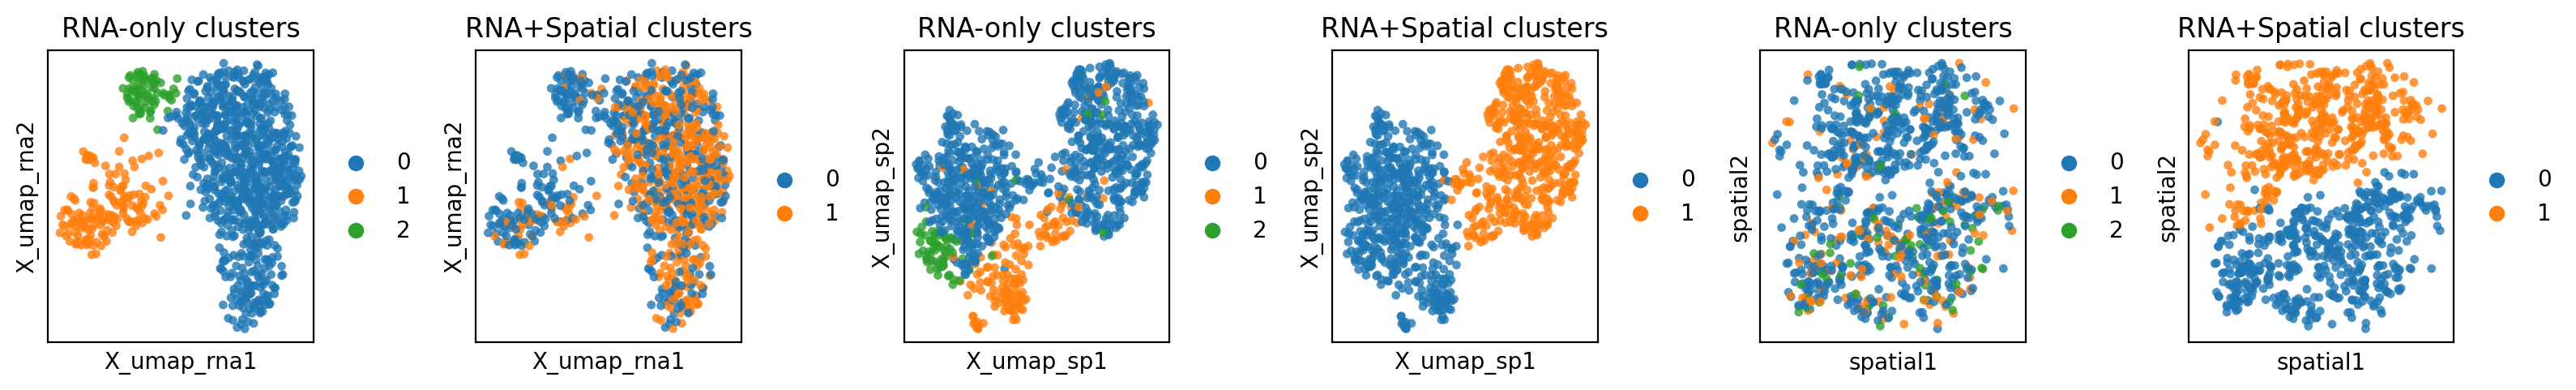

In [ ]:
fig, axes = plt.subplots(1, 6, figsize=(16, 2.5))
plot_config = [
    ('X_umap_rna', 'leiden_rna', 'RNA-only clusters',     0),
    ('X_umap_rna', 'leiden_sp',  'RNA+Spatial clusters',  1),
    ('X_umap_sp',  'leiden_rna', 'RNA-only clusters',     2),
    ('X_umap_sp',  'leiden_sp',  'RNA+Spatial clusters',  3),
    ('spatial',    'leiden_rna', 'RNA-only clusters',     4),
    ('spatial',    'leiden_sp',  'RNA+Spatial clusters',  5),
]
for b, c, t, col in plot_config:
    sc.pl.embedding(adata_tcells, basis=b, color=c, s=60, alpha=0.8, title=t, ax=axes[col], show=False)
plt.tight_layout()
fig_name = fig_path + 'figure2/fig2_m_slidetag_melanoma_CD8Tcell_rna_mixed_clusters_umap.svg'
plt.savefig(fig_name, format="svg", bbox_inches="tight")
plt.show() 

#### DEGs of CD8 T cells

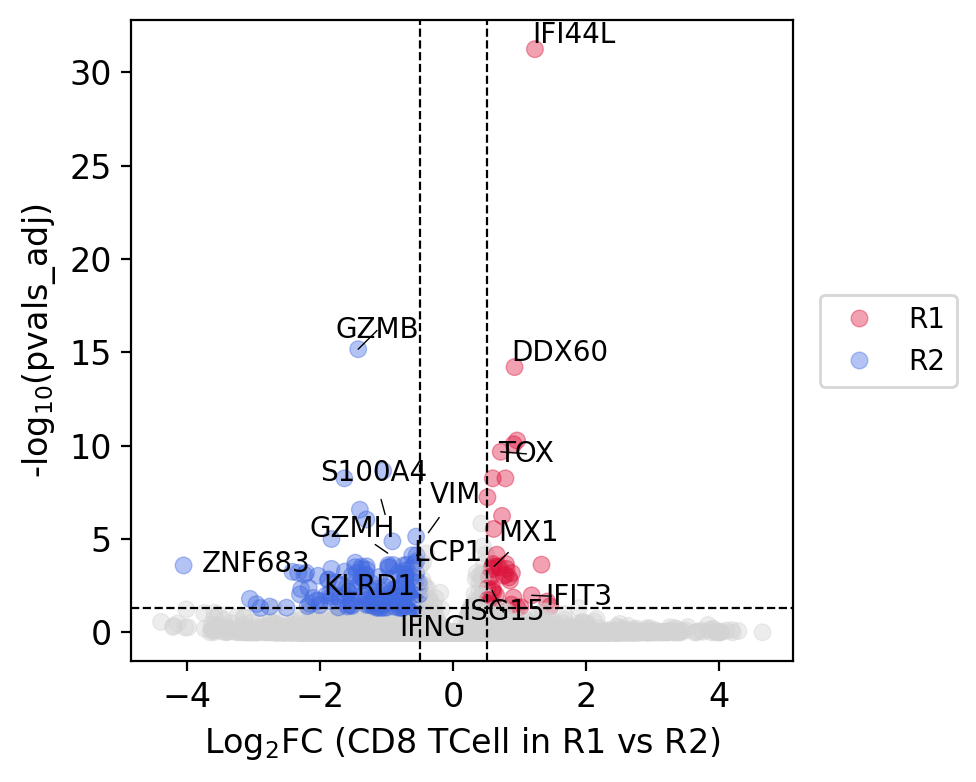

In [8]:
cluster_col = 'region_name'
adata_tcells.obs['region_name'] = adata_tcells.obs['leiden_sp'].map({"0": 'R2', "1": 'R1'}).astype('category')
sc.tl.rank_genes_groups(adata_tcells, groupby=cluster_col, reference='R2')
result = adata_tcells.uns['rank_genes_groups']
groups = result['names'].dtype.names 
de_genes = pd.DataFrame({group: result['names'][group] for group in groups}) 

# Data 
fig_tittle = "CD8 TCell" 
result = adata_tcells.uns['rank_genes_groups']
de_df = pd.DataFrame({
    'gene': result['names']['R1'],
    'logfc': result['logfoldchanges']['R1'],
    'pvals': result['pvals_adj']['R1']
})
log2fc_cutoff = 0.5
log2fc_outlier = 10

R2_genes = ["PRF1", "GZMB", "IFNG", "GZMH", "ZNF683", "KLRD1", "LCP1", "S100A4", "VIM"]      
R1_genes = [ "TOX", "ISG15", "IFIT3", "MX1", "IFI6", "DDX60", "IFI44L"]      

select_genes = R2_genes + R1_genes
de_df = de_df[de_df['logfc'].abs() < log2fc_outlier].copy()
de_df['-log10(padj)'] = -np.log10(de_df['pvals'].replace(0, 1e-300))
de_df['significant'] = (de_df['pvals'] < 0.05) & (de_df['logfc'].abs() > log2fc_cutoff)

def zone_direction(row):
    if row['significant']:
        return 'R2' if row['logfc'] < -log2fc_cutoff else 'R1'
    else:
        return '' 
de_df['zone'] = de_df.apply(zone_direction, axis=1)
palette = {'R1': 'crimson', 'R2': 'royalblue', '': 'lightgrey'}
select_genes = de_df.loc[(de_df['significant']) & (de_df['gene'].isin(select_genes)), 'gene'].unique().tolist()
de_df['highlight'] = de_df['gene'].apply(lambda g: g if g in select_genes else '')

# Plot 
from adjustText import adjust_text
plt.figure(figsize=(5, 4))
sns.scatterplot(data=de_df, x='logfc', y='-log10(padj)', hue='zone', rasterized=True,
                palette=palette, edgecolor=None, alpha=0.4, legend='brief')
texts = []
for _, row in de_df[de_df['highlight'] != ''].iterrows():
    ha = 'right' if row['logfc'] < 0 else 'left'
    texts.append(plt.text(row['logfc'], row['-log10(padj)'], row['gene'], fontsize=10, ha=ha))
adjust_text(
    texts,
    force_text=(0.2, 0.5),
    force_points=0.2,
    arrowprops=dict(arrowstyle='-', color='black', lw=0.5, shrinkA=10, shrinkB=10) 
)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axvline(log2fc_cutoff, color='black', linestyle='--', linewidth=0.8)
plt.axvline(-log2fc_cutoff, color='black', linestyle='--', linewidth=0.8)
plt.axhline(-np.log10(0.05), color='black', linestyle='--', linewidth=0.8)
plt.grid(False)
plt.xlabel(f"Log$_2$FC ({fig_tittle} in R1 vs R2)", fontsize=12)
plt.ylabel("-log$_{10}$(pvals_adj)", fontsize=12)
plt.title("")
plt.legend(title="", loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=10, title_fontsize=10)
plt.tight_layout()
fig_name = fig_path + 'figure2/fig2_m_slidetag_melanoma_CD8Tcell_DEGs_volcan_plot.svg'
plt.savefig(fig_name, format="svg", bbox_inches="tight")
plt.show()

In [12]:
r1_count = de_df[(de_df['zone'] == 'R1') & (de_df['significant'] == True)].shape[0]
r2_count = de_df[(de_df['zone'] == 'R2') & (de_df['significant'] == True)].shape[0]
print(f"R1 zone significant genes: {r1_count}")
print(f"R2 zone significant genes: {r2_count}")

R1 zone significant genes: 45
R2 zone significant genes: 171


#### CD8 T cell module scores

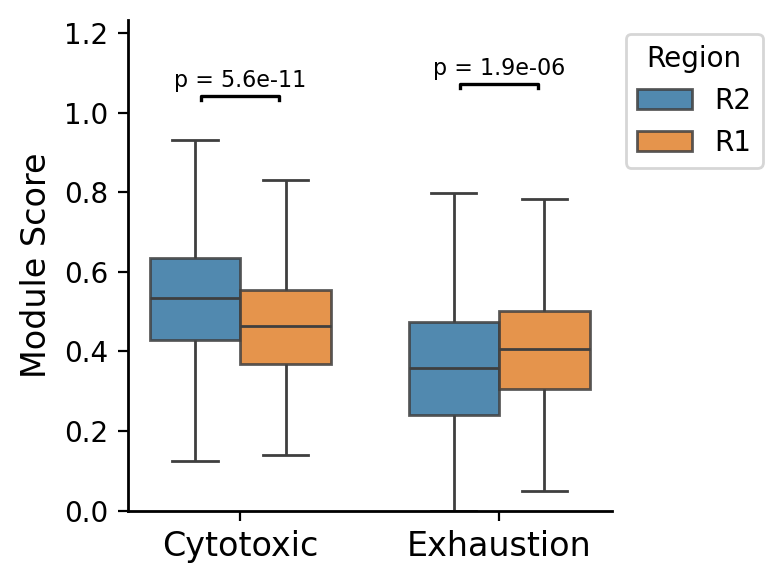

In [96]:
cytotoxic_genes = ["PRF1", "GZMB", "GZMA", "GZMH", "GZMK", "GZMM", "IFNG", "TNF", "FASLG", 
                   "GNLY", "SH2D1A", "RAB27A", "KLRD1", "NKG7", "KLRK1", "CD28", "ICOS", 
                   "TBX21", "EOMES", "RUNX3", "ITGAE", "CD8A", "CD8B"]
exhaustion_genes = ["TOX", "TOX2", "NR4A1", "NR4A2", "BATF", "IRF4", "PDCD1", "HAVCR2", 
                    "LAG3", "TIGIT", "CTLA4", "CD244", "ENTPD1", "CD38", "LAYN"]
min_genes = 5

# Data
expr_cytotoxic = pd.DataFrame(adata_tcells[:, cytotoxic_genes].X.toarray(), columns=cytotoxic_genes, index=adata_tcells.obs_names)
expr_exhaustion = pd.DataFrame(adata_tcells[:, exhaustion_genes].X.toarray(), columns=exhaustion_genes, index=adata_tcells.obs_names)
cells_cytotoxic = expr_cytotoxic.gt(0).sum(axis=1) >= min_genes
cells_exhaustion = expr_exhaustion.gt(0).sum(axis=1) >= min_genes
cells_to_keep = cells_cytotoxic | cells_exhaustion
metadata = adata_tcells.obs[[cluster_col]].copy()
metadata_filtered = metadata.loc[cells_to_keep].copy()
metadata_filtered["cytotoxic_score"] = expr_cytotoxic.loc[cells_to_keep].mean(axis=1)
metadata_filtered["exhaustion_score"] = expr_exhaustion.loc[cells_to_keep].mean(axis=1)
df_plot = pd.melt(
    metadata_filtered.reset_index(),
    id_vars=[cluster_col],
    value_vars=["cytotoxic_score", "exhaustion_score"],
    var_name="pathway",
    value_name="score"
)

from scipy.stats import mannwhitneyu
p_values = {}
for pathway in ["cytotoxic_score", "exhaustion_score"]:
    r1 = df_plot[(df_plot[cluster_col] == "R1") & (df_plot["pathway"] == pathway)]["score"]
    r2 = df_plot[(df_plot[cluster_col] == "R2") & (df_plot["pathway"] == pathway)]["score"]
    _, p = mannwhitneyu(r1, r2, alternative="two-sided")
    p_values[pathway] = p

# Plot
plt.figure(figsize=(4, 3))
ax = sns.boxplot(data=df_plot, x="pathway", y="score", hue=cluster_col, 
                 order=["cytotoxic_score", "exhaustion_score"], 
                 palette={"R1": "#ff7f0e", "R2": "#1f77b4"}, 
                 showfliers=False, width=0.7, linewidth=1)
for patch in ax.patches: 
    patch.set_alpha(0.85) 
for i, pathway in enumerate(["cytotoxic_score", "exhaustion_score"]):
    y_max = df_plot[df_plot["pathway"] == pathway]["score"].max()
    y_pos = y_max
    x = i
    p = p_values[pathway]
    ax.plot([x-0.15, x-0.15, x+0.15, x+0.15], [y_pos-0.01, y_pos, y_pos, y_pos-0.01], lw=1.2, c="black")
    ax.text(x, y_pos + 0.01, f"p = {p:.1e}" if p < 0.001 else f"p = {p:.3f}", ha="center", va="bottom", fontsize=8)
plt.title("")
plt.xlabel("")
ax.set_xticklabels(["Cytotoxic", "Exhaustion"], fontsize=12)
plt.ylabel("Module Score", fontsize=12)
plt.ylim(0, df_plot["score"].max() * 1.15)
plt.legend(title="Region", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(False)
sns.despine()
for spine in ax.spines.values():
    spine.set_edgecolor("black")
    spine.set_linewidth(1) 
plt.tight_layout()
fig_name = fig_path + 'figure2/fig2_m_slidetag_melanoma_CD8Tcell_ModuleScore_boxplot.svg'
plt.savefig(fig_name, format="svg", bbox_inches="tight")
plt.show()

#### RNA-only DEGs

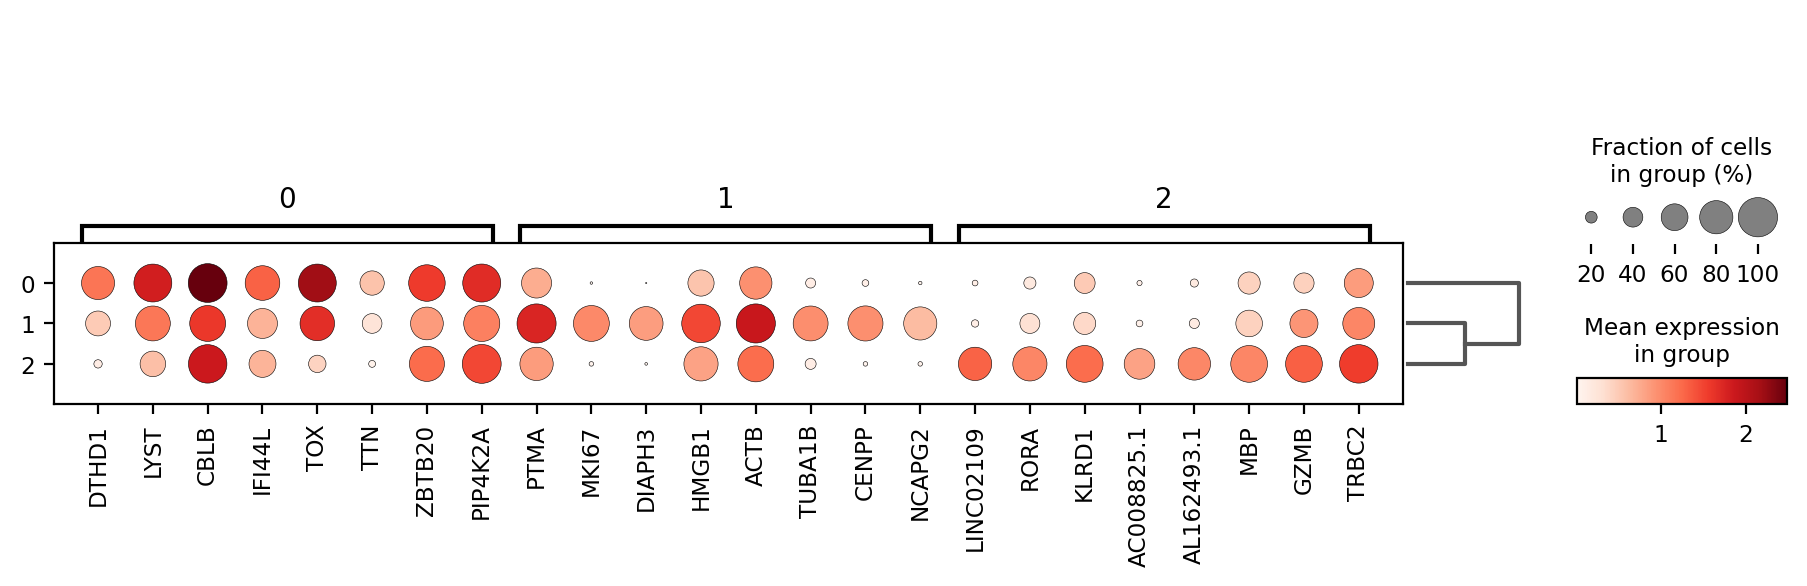

In [77]:
cluster_col = "leiden_rna"
sc.tl.dendrogram(adata_tcells, groupby=cluster_col)
sc.tl.rank_genes_groups(adata_tcells, groupby=cluster_col)
# Plot
sc.pl.rank_genes_groups_dotplot(adata_tcells, n_genes=8, groupby=cluster_col, show=False) 
fig_name = fig_path + 'figure2/fig2_m_slidetag_melanoma_CD8Tcell_dotplot_DEGs_RNA_only.svg'
plt.savefig(fig_name, format="svg", bbox_inches="tight")
plt.show()

## 3. monocyte/macrophage subsets

In [5]:
adata_mono_mac_path = os.path.join(dir, 'adata_mono_mac.h5ad')
if not os.path.exists(adata_mono_mac_path):
    # Subset mono-mac cells
    adata_raw = sc.read_h5ad(os.path.join(dir, 'rna_adata.h5ad'))
    adata_raw.obs['region_name'] = adata.obs['region_name'].copy()
    adata_raw.obsm['emb_smooth_100'] = adata.obsm['emb_smooth_100'].copy()
    adata_raw.obsm['emb_smooth_1000'] = adata.obsm['emb_smooth_1000'].copy()
    adata_mono_mac = adata_raw[adata_raw.obs['cell_type'] == 'mono-mac'].copy()

    # Load expression matrix and rebuild AnnData
    expr = pd.read_csv(os.path.join(dir, 'genes.csv'), index_col=0).T
    adata_mono_mac = AnnData(
        X=expr.loc[adata_mono_mac.obs_names].values,
        obs=adata_mono_mac.obs.copy(),
        var=pd.DataFrame(index=expr.columns),
        obsm=adata_mono_mac.obsm.copy()
    )

    # Preprocessing
    sc.pp.normalize_total(adata_mono_mac)
    sc.pp.log1p(adata_mono_mac) 
    sc.pp.highly_variable_genes(adata_mono_mac, n_top_genes=3000)

    # PCA & Neighbors (RNA only)
    sc.tl.pca(adata_mono_mac, n_comps=50, use_highly_variable=True, random_state=seed)
    sc.pp.neighbors(adata_mono_mac, use_rep='X_pca', random_state=seed)
    sc.tl.leiden(adata_mono_mac, resolution=0.2)
    sc.tl.umap(adata_mono_mac)
    adata_mono_mac.obs['leiden_rna'] = adata_mono_mac.obs['leiden']
    adata_mono_mac.obsm['X_umap_rna'] = adata_mono_mac.obsm['X_umap']

    # Save
    adata_mono_mac.write_h5ad(adata_mono_mac_path)
else: 
    print('Loading mono-mac cells adata')
    adata_mono_mac = sc.read_h5ad(adata_mono_mac_path) 

Loading mono-mac cells adata


In [6]:
# Spatial+RNA embedding
adata_mono_mac = train_neighbor_weights(
    adata_mono_mac, 
    feature_emb='X_pca', 
    spatial_emb='spatial', 
    log_barrier_w=100, 
    cuda='cuda:0', 
    seed=seed
)
print(
    f"Weight mean: {adata_mono_mac.obs['Weight'].mean():.4f}, "
    f"std: {adata_mono_mac.obs['Weight'].std():.4f}"
)
sc.pp.neighbors(adata_mono_mac, use_rep='X_emb_smooth', random_state=seed)
sc.tl.umap(adata_mono_mac, random_state=seed)
adata_mono_mac.obsm['X_umap_sp'] = adata_mono_mac.obsm['X_umap']
sc.tl.leiden(adata_mono_mac, resolution=0.2)
adata_mono_mac = spatial_smooth(adata_mono_mac, label_key='leiden')
adata_mono_mac.obs["leiden_sp"] = adata_mono_mac.obs['leiden']

Training: 100%|██████████| 10000/10000 [00:21<00:00, 466.52epoch/s, Loss: 267.5877]


Weight mean: 0.5334, std: 0.0862


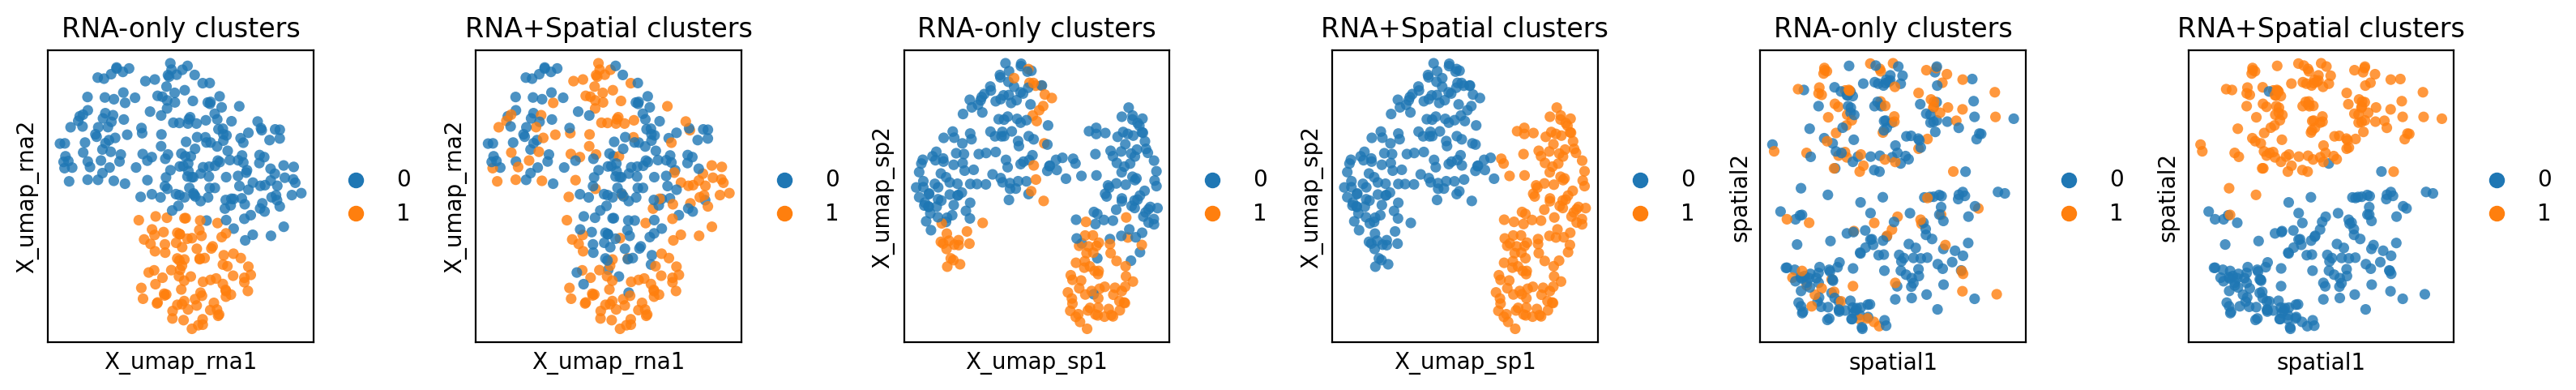

In [80]:
fig, axes = plt.subplots(1, 6, figsize=(16, 2.5))
plot_config = [
    ('X_umap_rna', 'leiden_rna', 'RNA-only clusters',     0),
    ('X_umap_rna', 'leiden_sp',  'RNA+Spatial clusters',  1),
    ('X_umap_sp',  'leiden_rna', 'RNA-only clusters',     2),
    ('X_umap_sp',  'leiden_sp',  'RNA+Spatial clusters',  3),
    ('spatial',    'leiden_rna', 'RNA-only clusters',     4),
    ('spatial',    'leiden_sp',  'RNA+Spatial clusters',  5),
]
for b, c, t, col in plot_config:
    sc.pl.embedding(adata_mono_mac, basis=b, color=c, s=90, alpha=0.8, title=t, ax=axes[col], show=False)
plt.tight_layout()
fig_name = fig_path + 'figure2/fig2_m_slidetag_melanoma_mono_mac_rna_mixed_clusters_umap.svg'
plt.savefig(fig_name, format="svg", bbox_inches="tight")
plt.show() 

100%|██████████| 20957/20957 [00:02<00:00, 8328.09it/s] 


Computing pair-wise local correlation on 1198 features...


100%|██████████| 717003/717003 [00:26<00:00, 26580.52it/s]


Computing scores for 19 modules...


100%|██████████| 19/19 [00:00<00:00, 36.23it/s]


Module_1  Module_2  Module_3    Module_4    Module_5 Module_6  \
0          FYN     IFI30     YWHAH        THRB         LYZ      SSB   
1          TOX    CALHM6       FN1        AQP9      RNASE1    CALM1   
2       THEMIS    FCER1G    IFITM3       PLCL1       IL4I1     IFI6   
3    LINC01934      NPC2    OLFML3       PARD3       CXCL9    ACTG1   
4        SKAP1    TYROBP      PPIB        ROR2    HLA-DPB1     CCR1   
5      SLC38A1  SERPINA1      CAPG       MCTP2    HLA-DRB1     BRI3   
6        IKZF3      CTSD   PRELID1     ADAMTS2    HLA-DPA1     TUBB   
7       TSPAN5  HSP90AB1      CD37        MRC1       IGSF6    H3F3A   
8       BCL11B     PRDX1    TUBA1B       LRP1B    HLA-DRB5    EIF5A   
9        KLRK1      CD81    LGALS3       KCNQ3     HLA-DRA  EMILIN2   
10       DTHD1      ACTB     EFHD2        RND3     HLA-DMA     MESD   
11  AF165147.1   S100A11      TLN1    MIR99AHG    HLA-DQA1    NUCB1   
12        CD96     APOC1      CFL1       F13A1    HLA-DQB1  PLEKHO1   
13     PPP2R2B       VIM      PFN1       IL2RA       EEF1G   RAB5IF   
14      INPP4B      LY6E    IFITM2  AC116611.1        CD74    CALM3   
15        TC2N    FCGR1A     TMED2       DISP1      SLAMF7    SRP14   
16         CD2      AIF1      HCST       FARP1  AC020656.1    FXYD5   
17       SCML4      CTSL  SH3BGRL3       NSUN7      RNASE6    PSMC3   
18        ETS1  HSP90AA1     DRAP1       NPAS3     HLA-DMB   LILRB4   
19      GPR174     PSME2    PSMB10        ERC2       RPL19    PTAFR   

      Module_7    Module_8 Module_9 Module_10 Module_11 Module_12   Module_13  \
0   AC011586.2   LINC02006      MX1      YBX1      OLR1    S100A9       TANC2   
1        MTSS1       NHSL1    RSAD2     SRSF9      IDO1     ISG15  AL162414.1   
2         PRKN      ADGRG6   LGALS1      DPP7    S100A4      SPP1     TBC1D16   
3          ME1         CPM   METRNL     RPS25     COTL1    S100A8       MERTK   
4        PDGFC        EXT1    CEBPB    TALDO1      LSP1      MT2A  SUCLG2-AS1   
5      LNCAROD     CARMIL1   ATP5PD    EIF4G2     RPS3A    FERMT3    ARHGAP12   
6        MYO10      SLC9A9     TYMP   CHCHD10      RPS6     SIRPA   C20orf194   
7      SELENOP  AC120193.1    ANXA2     ATOX1     COX5A      CCL8       MAML3   
8       SH3RF3       ACYP2     LDHA     COX6C      LCP1     VSIG4      TCF7L2   
9   AC078788.1      CCDC26    FABP5     HMGN2    CORO1A     PLAUR     LDLRAD4   
10      BMPR1A     STARD13     TPM3   WDR83OS      SSR3      LGMN        VPS8   
11       TTC28     EPB41L2    G6PC3     PARK7      MYH9      SRGN        MLH3   
12       ITSN1      TBC1D8     IRF7  ATP6V1G1    GIMAP7   SLC43A3       MGAT5   
13        TCF4      IMMP2L    CD164  C19orf38      BTF3      CD82       ITPR2   
14        NFIA       MYO1E    IFIT2     HSPD1     RPL24      HAMP       TFDP2   
15        IGF1      FRMD4B   COX6A1    DNAJC8     RPL13     CREG1      TDRD10   
16        DTNB  AC083837.1    UBE2S   ATP5F1B   SUPT16H    SCARB2       APPL2   
17        ANK2      FRMD4A    CISD3     TGFB1      EIF1     IFIT3       TMLHE   
18        EYA2     ZDHHC14    PSMA4   NDUFB11     RPL14     FUCA2       CPNE8   
19     RPS6KA2  AL356124.1    PARP1      NARS   SLC25A6    NFE2L1  MIR29B2CHG   

   Module_14 Module_15   Module_16 Module_17   Module_18 Module_19  
0      IFI27   PLA2G2D       ITGA4      IL32          CP     TPRG1  
1      RRBP1       CFD      CCSER1   TMEM205        MMP9   SLC39A8  
2     RNASE2        C2       HDAC9     ITGAL        RTN1   SLC11A1  
3        MDK     GPNMB        IDO2    MT-CYB      CLEC4E     NAMPT  
4     LEPROT     NUPR1        ZEB1     KCNJ2          C3     LAMC1  
5     SCPEP1      LIPA        JAML      ADA2  AC023590.1    NFKBIZ  
6      APOL1    CXCL11        ANK3     IL2RG     GUCY1A1      DKK2  
7      MMP14    CHI3L1        PPA1    TGOLN2      P2RY12   UBASH3B  
8      LAMP1   SELENOS   LINC00278      FCN1      OGFRL1     TGIF1  
9      PLBD1     PILRA        CD93   CLEC10A      CXCL12     FOXP2  
10    DNAJA1     LAMP2         UTY     PSMB6  AC07901

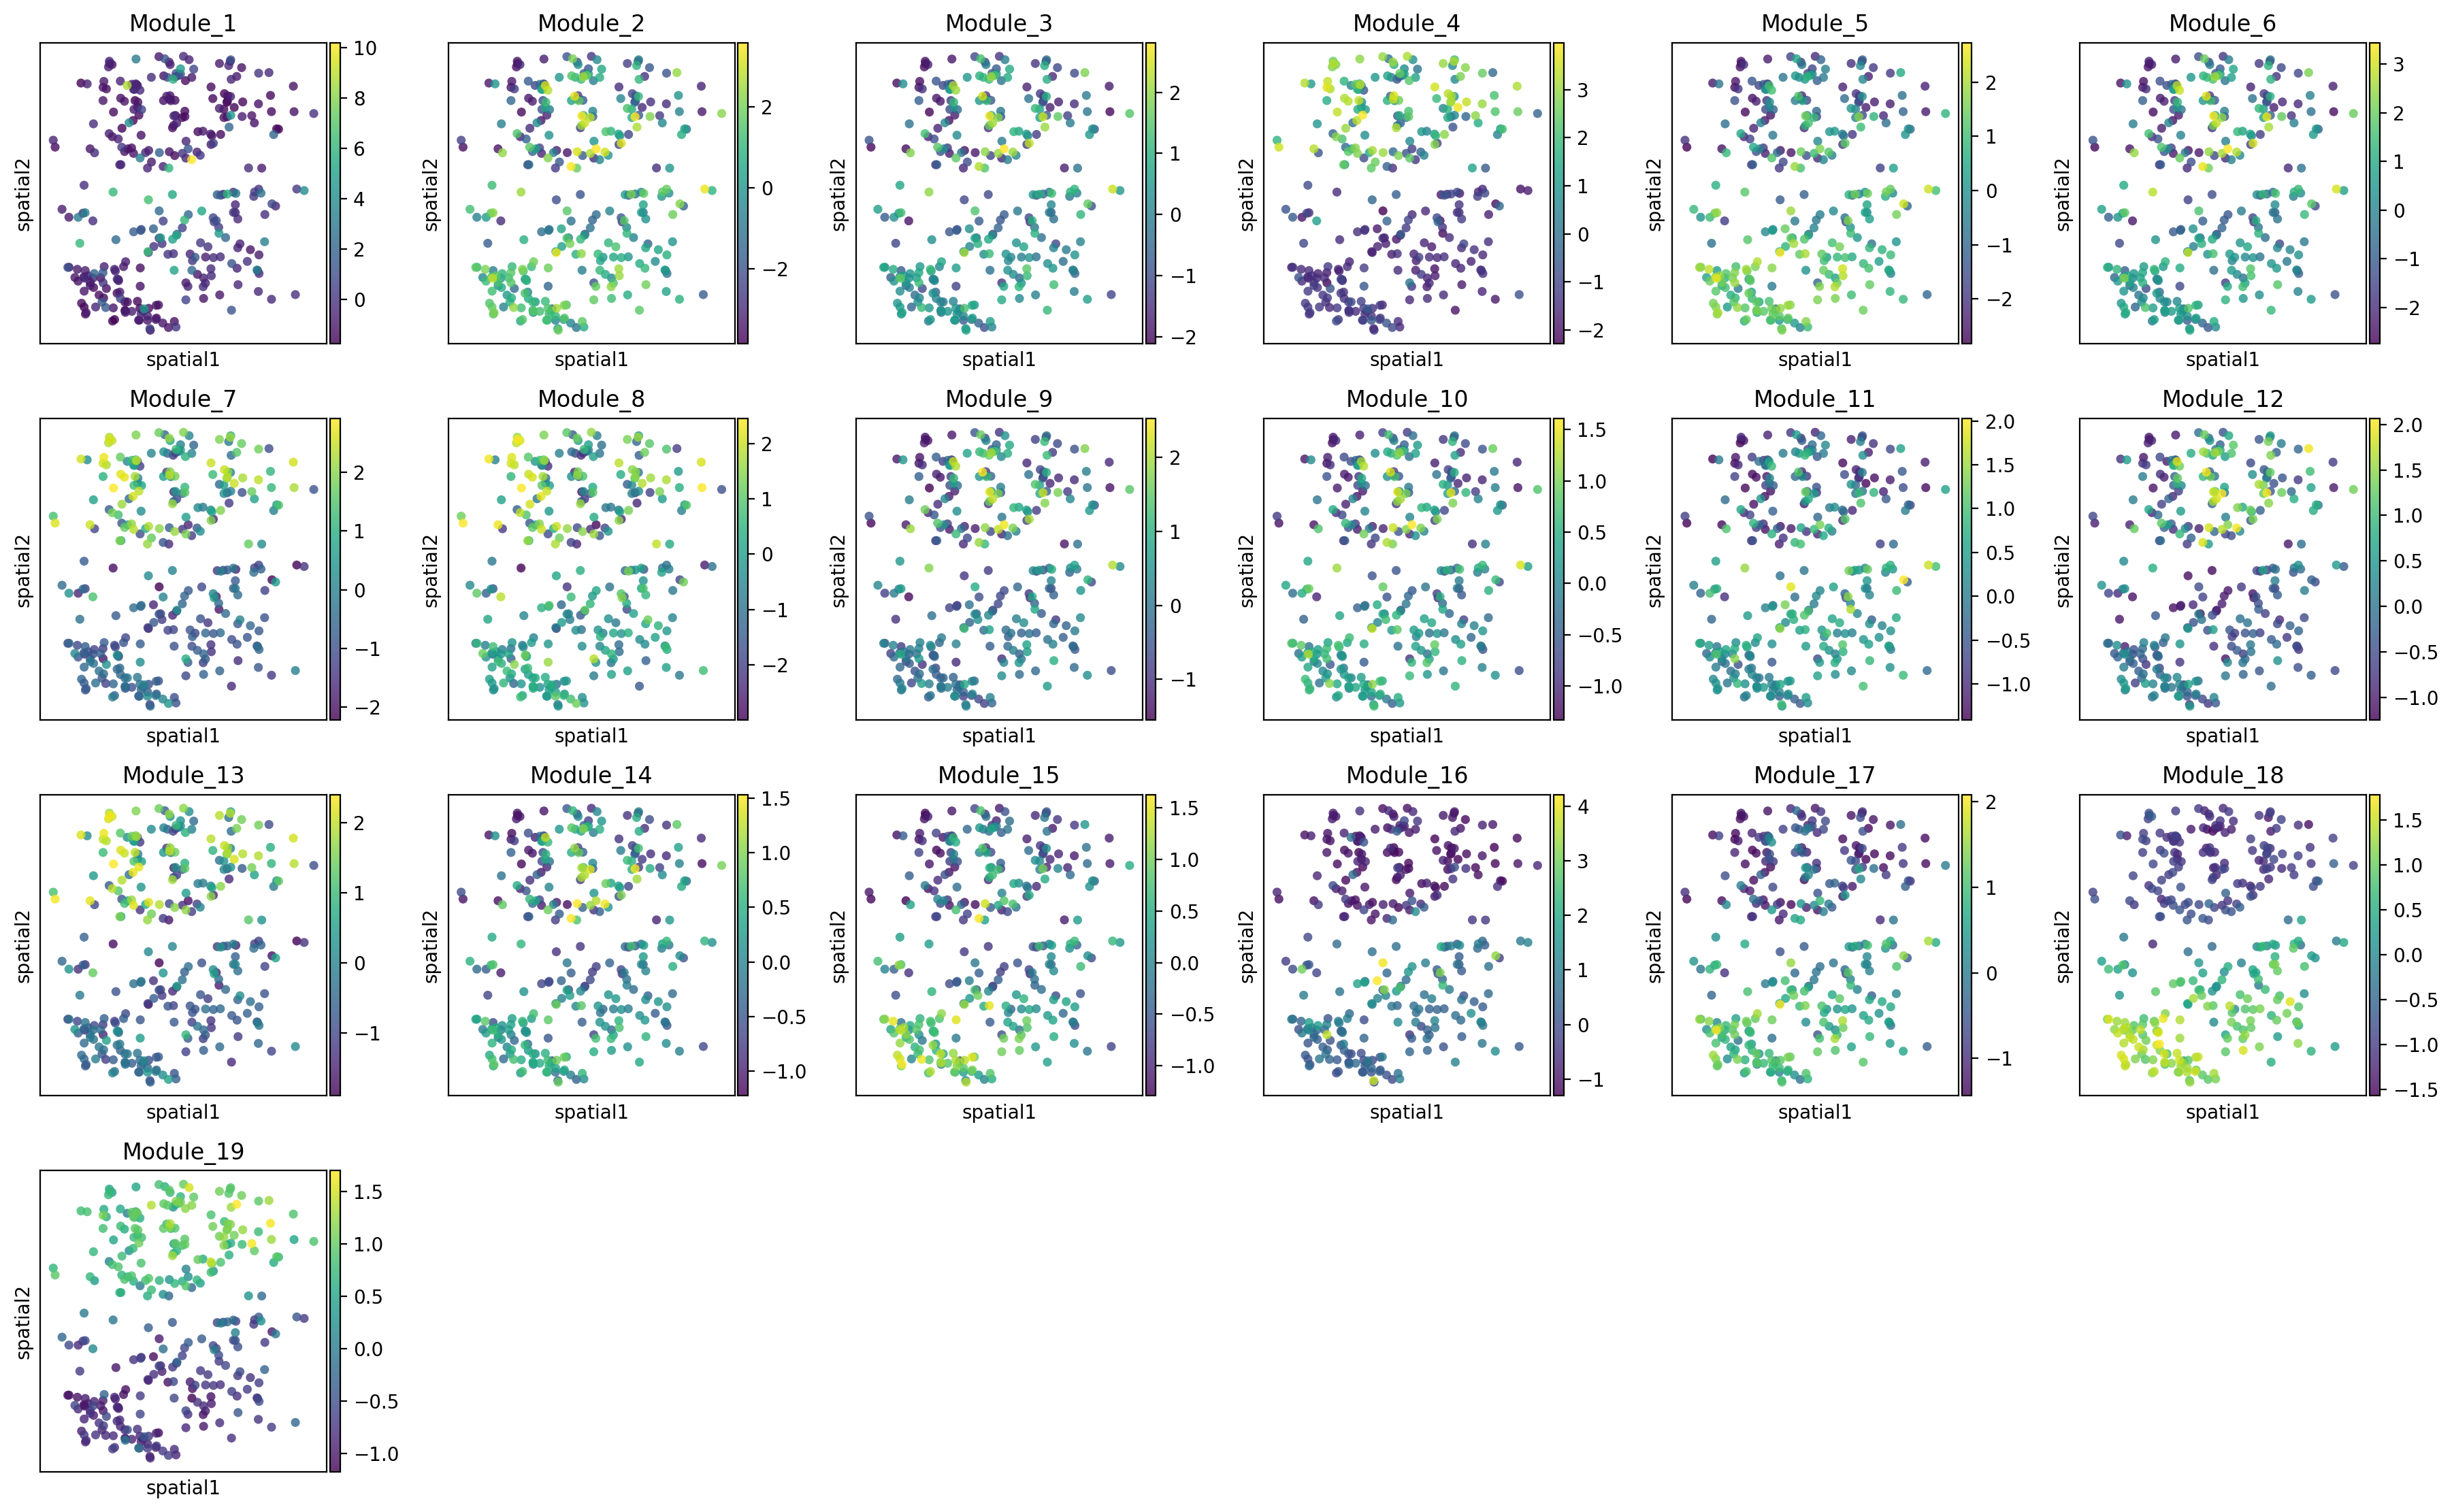

In [9]:
# Hotspot
import hotspot
import math 

idx = 2
seed = 42
latent_obsm_key = ['X_pca', 'spatial', 'X_emb_smooth'][idx]
save_index = ['RNA_only', 'spatial_only', 'subset_spw100'][idx]

adata = adata_mono_mac.copy()

set_seed(seed) 
adata.obs["total_counts"] = np.array(adata.X.sum(axis=1)).flatten()
adata = adata[:, np.array(adata.X.sum(axis=0)).flatten() > 0].copy()
hs = hotspot.Hotspot(adata, model='danb', latent_obsm_key=latent_obsm_key, umi_counts_obs_key="total_counts")
hs.create_knn_graph(weighted_graph=False, n_neighbors=100)
hs_results = hs.compute_autocorrelations()
hs_genes = hs_results.loc[hs_results.FDR < 0.05].index 
local_correlations = hs.compute_local_correlations(hs_genes, jobs=4) 
modules = hs.create_modules()
# Plot heatmap
# hs.plot_local_correlations(yticklabels=False)
# Add to adata
module_scores = hs.calculate_module_scores() 
module_scores.columns = [f"Module_{str(col)}" for col in module_scores.columns]
adata.obs = adata.obs.drop(columns=module_scores.columns, errors='ignore') 
adata.obs = adata.obs.join(module_scores) 
# Print module genes 
def create_module_gene_table(gene_modules, top_n=20):
    module_dict = {}
    for module_id in sorted(gene_modules.unique()):
        if module_id == -1:
            continue
        gene_list = gene_modules[gene_modules == module_id].index.tolist()
        if not (isinstance(top_n, (int, float)) and np.isnan(top_n)):
            gene_list = gene_list[:int(top_n)]
        module_dict[f"Module_{module_id}"] = gene_list
    max_len = max(len(glist) for glist in module_dict.values())
    module_table = pd.DataFrame({
        k: v + [""] * (max_len - len(v)) for k, v in module_dict.items()
    })
    return module_table
gene_modules = modules.copy()
module_table = create_module_gene_table(gene_modules)
display(module_table)
# Save scores and genes
module_table_save = create_module_gene_table(gene_modules, top_n=np.nan)
module_table_save.to_csv(f"{dir}mono_mac_hotspot_genes_{save_index}.csv", index=False)
module_scores.to_csv(f"{dir}mono_mac_hotspot_scores_{save_index}.csv", index=False)
# Plot spatial distribution
ncols = 6
module_names = [f"Module_{i}" for i in range(1, module_scores.shape[1]+1)]
nrows = math.ceil(len(module_names) / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(3 * ncols, 2.8 * nrows))
axes = axes.flatten()
for i, module in enumerate(module_names):
    sc.pl.embedding(adata, basis="spatial", color=module, s=90, alpha=0.8, ax=axes[i], show=False, title=module)
for j in range(i + 1, len(axes)):
    axes[j].axis("off")
plt.tight_layout()
plt.show() 

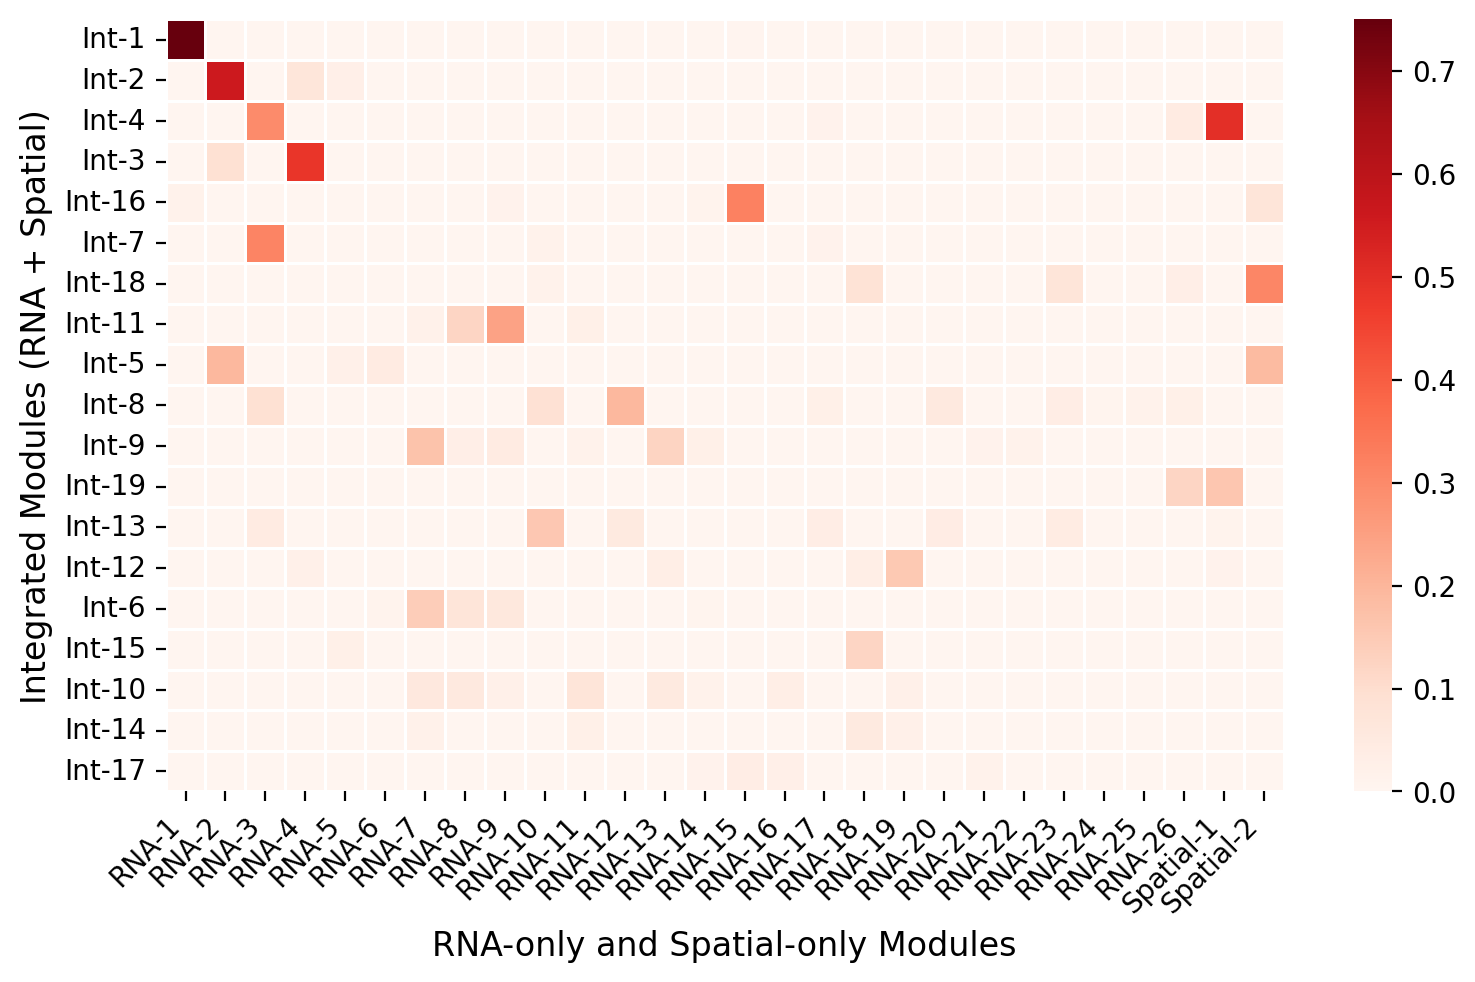

In [7]:
save_index_list = ['RNA_only', 'spatial_only', 'subset_spw100']
module_dict = {}
for idx in save_index_list:
    file_path = f"{dir}mono_mac_hotspot_genes_{idx}.csv"
    df = pd.read_csv(file_path)
    module_dict[idx] = {
        f"{idx}_{col}": set(gene for gene in df[col].dropna().astype(str) if gene.strip() != '')
        for col in df.columns
    }
rna_modules = module_dict['RNA_only']
spatial_modules = module_dict['spatial_only']
integrated_modules = module_dict['subset_spw100']

all_modules = {
    **{f'RNA:{k}': v for k, v in rna_modules.items()},
    **{f'Spatial:{k}': v for k, v in spatial_modules.items()},
    **{f'Integrated:{k}': v for k, v in integrated_modules.items()},
}
rna_keys = [f'RNA:{k}' for k in rna_modules]
spatial_keys = [f'Spatial:{k}' for k in spatial_modules]
integrated_keys = [f'Integrated:{k}' for k in integrated_modules]
name_map = {}
name_map.update({k: f'RNA-{i+1}' for i, k in enumerate(rna_keys)})
name_map.update({k: f'Spatial-{i+1}' for i, k in enumerate(spatial_keys)})
name_map.update({k: f'Int-{i+1}' for i, k in enumerate(integrated_keys)})
row_labels = rna_keys + spatial_keys
col_labels = integrated_keys

jaccard_matrix = pd.DataFrame(
    index=[name_map[i] for i in row_labels],
    columns=[name_map[j] for j in col_labels],
    dtype=float
)
for i in row_labels:
    for j in col_labels:
        set_i = all_modules[i]
        set_j = all_modules[j]
        intersection = len(set_i & set_j)
        union = len(set_i | set_j)
        jaccard_matrix.loc[name_map[i], name_map[j]] = intersection / union if union != 0 else 0

sorted_columns = jaccard_matrix.max(axis=0).sort_values(ascending=False).index
jaccard_matrix = jaccard_matrix[sorted_columns]

plt.figure(figsize=(8, 5))
sns.heatmap(jaccard_matrix.T, cmap='Reds', annot=False, fmt=".2f", linewidths=0.5)
plt.ylabel("Integrated Modules (RNA + Spatial)", fontsize=12)
plt.xlabel("RNA-only and Spatial-only Modules", fontsize=12)
plt.title("", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
fig_name = fig_path + 'figure2/fig2_m_slidetag_melanoma_mono_mac_modules_correlation_heatmap.svg'
plt.savefig(fig_name, format="svg", bbox_inches="tight")
plt.show() 

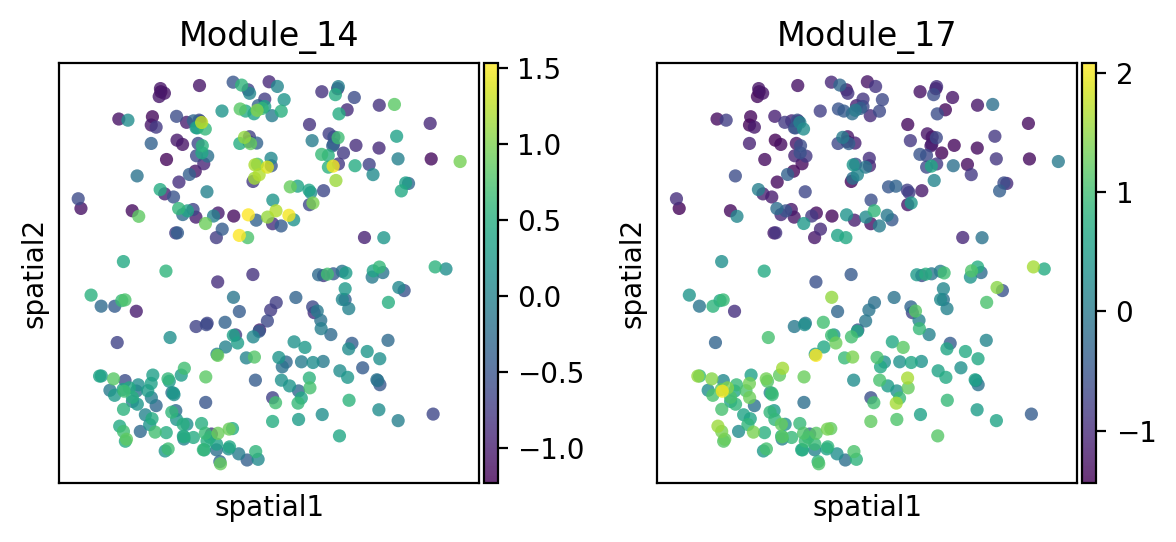

In [107]:
modules_to_plot = [14, 17]
module_names = [f"Module_{i}" for i in modules_to_plot]
fig, axes = plt.subplots(1, 2, figsize=(6, 2.8)) 
for ax, module_name in zip(axes, module_names):
    sc.pl.embedding(adata, basis="spatial", color=module_name, s=90, alpha=0.8, ax=ax, show=False, title=module_name)
plt.tight_layout()
fig_name = fig_path + 'figure2/fig2_m_slidetag_melanoma_mono_mac_modules_14_17_spatial_distribution.svg'
plt.savefig(fig_name, format="svg", bbox_inches="tight")
plt.show()

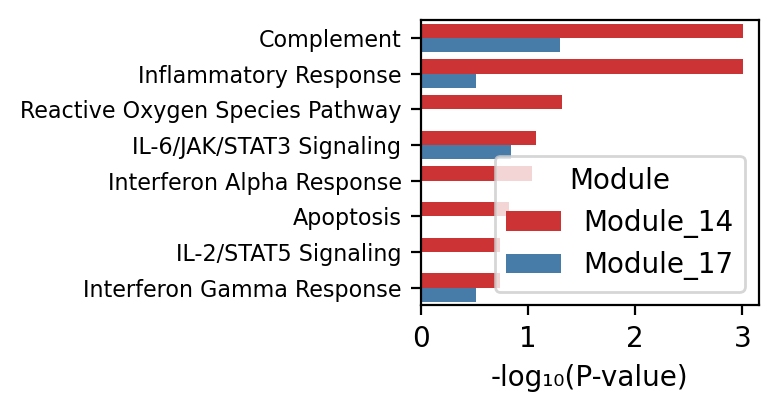

In [22]:
import gseapy as gp
immune_related_pathways = [
    "Complement",
    "Inflammatory Response",
    "IL-6/JAK/STAT3 Signaling",
    "IL-2/STAT5 Signaling",
    "Interferon Alpha Response",
    "Interferon Gamma Response",
    "Apoptosis",
    "Reactive Oxygen Species Pathway"
]

save_index = 'subset_spw100'
module_table_save = pd.read_csv(f"{dir}mono_mac_hotspot_genes_{save_index}.csv")

selected_modules = [14, 17]
module_gene_dict = {
    f"Module_{i}": module_table_save[f"Module_{i}"].dropna().tolist()
    for i in selected_modules
    if f"Module_{i}" in module_table_save.columns
}
combined_results = []
for module_name, gene_list in module_gene_dict.items():
    enr = gp.enrichr(
        gene_list=gene_list,
        gene_sets=[
            'GO_Biological_Process_2021',
            'GO_Molecular_Function_2021',
            'GO_Cellular_Component_2021',
            'KEGG_2021_Human',
            'Reactome_2022',
            'WikiPathway_2021_Human',
            'MSigDB_Hallmark_2020'
        ],
        organism='Human',
        cutoff=1.0,
        verbose=False
    )
    if enr.res2d.shape[0] > 0:
        df = enr.res2d.copy()
        df["-log10(P-value)"] = -np.log10(df["P-value"])
        df["Module"] = module_name
        df = df[df["Term"].isin(immune_related_pathways)]
        combined_results.append(df)
immune_df = pd.concat(combined_results, axis=0)
immune_df = immune_df.sort_values("-log10(P-value)", ascending=False)

plt.figure(figsize=(4, 0.18 * len(immune_df)))
ax = sns.barplot(
    data=immune_df,
    y="Term",
    x="-log10(P-value)",
    hue="Module",
    dodge=True,
    palette="Set1"
)
ax.set_yticks(range(len(immune_df["Term"].unique())))
ax.set_yticklabels(immune_df["Term"].unique(), fontsize=8)
plt.xlabel("-log₁₀(P-value)", fontsize=10)
plt.ylabel("", fontsize=1)
plt.title("", fontsize=1)
plt.tight_layout()
save_path = fig_path + "figure2/fig2_s_slidetag_melanoma_mono_mac_modules_14_17_selected_immune_pathways.svg"
plt.savefig(save_path, bbox_inches="tight")
plt.show()

## 3. Tumor subtypes

In [13]:
set_seed(seed)
adata = sc.read_h5ad(save_path)
adata_tumor = adata[adata.obs['cell_type'].isin(['tumour_1', 'tumour_2'])].copy()
# Load expression matrix and rebuild AnnData
expr = pd.read_csv(os.path.join(dir, 'genes.csv'), index_col=0).T
adata_tumor = AnnData(
    X=expr.loc[adata_tumor.obs_names].values,
    obs=adata_tumor.obs.copy(),
    var=pd.DataFrame(index=expr.columns),
    obsm=adata_tumor.obsm.copy()
)
# Preprocessing
sc.pp.normalize_total(adata_tumor)
sc.pp.log1p(adata_tumor) 

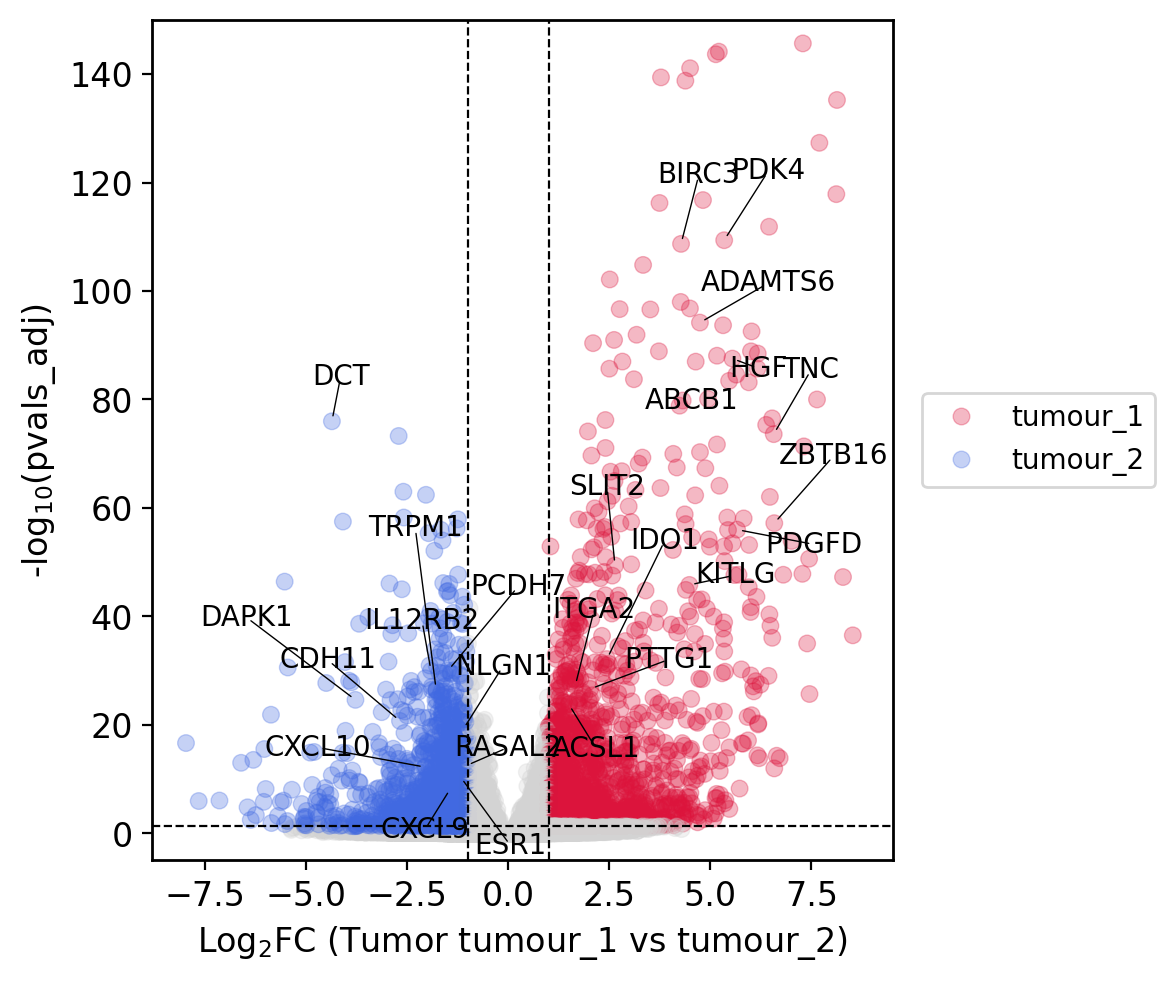

In [14]:
sc.tl.rank_genes_groups(adata_tumor, groupby='cell_type', reference='tumour_2')
result = adata_tumor.uns['rank_genes_groups']
groups = result['names'].dtype.names 
de_genes = pd.DataFrame({group: result['names'][group] for group in groups}) 

# Data 
fig_tittle = "Tumor" 
result = adata_tumor.uns['rank_genes_groups']
de_df = pd.DataFrame({
    'gene': result['names']['tumour_1'],
    'logfc': result['logfoldchanges']['tumour_1'],
    'pvals': result['pvals_adj']['tumour_1']
})
log2fc_cutoff = 1
log2fc_outlier = 12
R1_genes = [
    "DCT",       # 1  — Melanocyte Differentiation (Melanin synthesis)
    "TRPM1",     # 22 — Melanocyte Differentiation (Melastatin marker)
    "CDH11",     # 26 — Cell Adhesion (Osteoblast-cadherin)
    "PCDH7",     # 16 — Cell Adhesion (Protocadherin 7)
    "IL12RB2",   # 14 — Signaling Pathways (IL-12 receptor)
    "CXCL9",     # 62 — Signaling Pathways (IFN-γ induced chemokine)
    "CXCL10",    # 47 — Signaling Pathways (IP-10 chemokine)
    "DAPK1",     # 17 — Tumor Suppression (Pro-apoptotic kinase)
    "RASAL2",    # 50 — Tumor Suppression (RAS GTPase activator)
    "ESR1",      # 54 — Tumor Suppression (Estrogen receptor)
    "NLGN1",     # 32 — Nervous System (Synaptic adhesion)
    "TYRP1"      # *  — Melanocyte Differentiation (Melanin synthesis)
]
R2_genes = [ 
    "HGF",       # 26 — Invasion/Metastasis (c-MET signaling)
    "ADAMTS6",   # 24 — Invasion/Metastasis (ECM remodeling)
    "TNC",       # 29 — Invasion/Metastasis (Pro-metastatic matrix)
    "ITGA2",     # 61 — Invasion/Metastasis (Integrin-mediated migration)
    "BIRC3",     # 14 — Proliferation/Survival (Anti-apoptotic)
    "KITLG",     # 50 — Proliferation/Survival (Stem cell factor)
    "PDGFD",     # 39 — Proliferation/Survival (Angiogenesis)
    "PTTG1",     # 66 — Proliferation/Survival (Mitotic regulator)
    "PDK4",      # 11 — Metabolism (Glycolysis regulation)
    "ACSL1",     # 70 — Metabolism (Fatty acid activation)
    "ABCB1",     # 25 — Drug Resistance (Multidrug efflux pump)
    "IDO1",      # 60 — Drug Resistance (Immunosuppression)
    "ZBTB16",    # 38 — Epigenetic Regulation (Transcriptional repressor)
    "SLIT2"      # 47 — Invasion/Metastasis (Cell migration guidance)
]      
select_genes = R2_genes + R1_genes
de_df = de_df[de_df['logfc'].abs() < log2fc_outlier].copy()
de_df['-log10(padj)'] = -np.log10(de_df['pvals'].replace(0, 1e-300))
de_df['significant'] = (de_df['pvals'] < 0.05) & (de_df['logfc'].abs() > log2fc_cutoff)

def zone_direction(row):
    if row['significant']:
        return 'tumour_2' if row['logfc'] < -log2fc_cutoff else 'tumour_1'
    else:
        return '' 
de_df['zone'] = de_df.apply(zone_direction, axis=1)
palette = {'tumour_1': 'crimson', 'tumour_2': 'royalblue', '': 'lightgrey'}
select_genes = de_df.loc[(de_df['significant']) & (de_df['gene'].isin(select_genes)), 'gene'].unique().tolist()
de_df['highlight'] = de_df['gene'].apply(lambda g: g if g in select_genes else '')

# Plot 
from adjustText import adjust_text

plt.figure(figsize=(6, 5))
sns.scatterplot(data=de_df, x='logfc', y='-log10(padj)', hue='zone', rasterized=True,
                palette=palette, edgecolor=None, alpha=0.3, legend='brief')
texts = []
for _, row in de_df[de_df['highlight'] != ''].iterrows():
    ha = 'right' if row['logfc'] < 0 else 'left'
    texts.append(plt.text(row['logfc'], row['-log10(padj)'], row['gene'], fontsize=10, ha=ha))
adjust_text(texts, force_text=(0.1, 0.1), force_points=0, arrowprops=dict(arrowstyle='-', color='black', lw=0.5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axvline(log2fc_cutoff, color='black', linestyle='--', linewidth=0.8)
plt.axvline(-log2fc_cutoff, color='black', linestyle='--', linewidth=0.8)
plt.axhline(-np.log10(0.05), color='black', linestyle='--', linewidth=0.8)
plt.grid(False)
plt.xlabel(f"Log$_2$FC ({fig_tittle} tumour_1 vs tumour_2)", fontsize=12)
plt.ylabel("-log$_{10}$(pvals_adj)", fontsize=12)
plt.title("")
plt.ylim(de_df['-log10(padj)'].min()-5, 150)
ax = plt.gca()  
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)
plt.legend(title="", loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=10, title_fontsize=10)
plt.tight_layout()
fig_name = fig_path + 'figure2/fig2_m_slidetag_melanoma_Tumor_subtypes_DEGs_volcan_plot.svg'
plt.savefig(fig_name, format="svg", bbox_inches="tight")
plt.show() 

In [16]:
r1_count = de_df[(de_df['zone'] == 'tumour_1') & (de_df['significant'] == True)].shape[0]
r2_count = de_df[(de_df['zone'] == 'tumour_2') & (de_df['significant'] == True)].shape[0]
print(f"tumour_1 zone significant genes: {r1_count}")
print(f"tumour_2 zone significant genes: {r2_count}")

tumour_1 zone significant genes: 1635
tumour_2 zone significant genes: 1414


# Load Banksy Embeddings

In [ ]:
%reload_ext rpy2.ipython

In [ ]:
%%R

suppressMessages(library(Banksy))
suppressMessages(library(qs))
suppressMessages(library(scater))
suppressMessages(library(SummarizedExperiment))
suppressMessages(library(SpatialExperiment))
suppressMessages(library(Seurat))
suppressMessages(library(SeuratData))
suppressMessages(library(SeuratWrappers))

mm_path <- '/data/qiyu/spatialRegion/data/slidetag/slidetag_mm1_ee/'
mm <- qread(paste0(mm_path, 'mm.qs'))

run_banksy <- function(obj, lambda, k_geom, seed) {
  obj <- computeLibraryFactors(obj)
  assay(obj, "normcounts") <- normalizeCounts(obj, log = FALSE)
  obj <- Banksy::computeBanksy(obj, assay_name = "normcounts", compute_agf = TRUE, k_geom = k_geom, seed = seed)
  obj <- Banksy::runBanksyPCA(obj, use_agf = TRUE, seed = seed, lambda = lambda)
  obj <- Banksy::runBanksyUMAP(obj, use_agf = TRUE, lambda = lambda)
  message(paste0("Dim names: ", names(obj@int_colData@listData$reducedDims)))
  return(obj)
}

# cellular clustering
lambda_list = c(0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8)
k_geom = c(15, 30)
seed = 0
for (lambda in lambda_list) {
  set.seed(seed)
  exprs_matrix = mm@assays$RNA@counts
  locs = mm@reductions$spatial@cell.embeddings
  se = SpatialExperiment(assay = list(counts = exprs_matrix), spatialCoords = locs)
  se = run_banksy(se, lambda, k_geom, seed)
  umap <- se@int_colData@listData$reducedDims@listData[[paste0("UMAP_M1_lam", lambda)]]
  write.csv(umap, paste0(mm_path, 'Banksy_UMAP_lambda', lambda, '.csv'))
}

In [ ]:
# Load Banksy UMAP
color_key = "cell_type"

# spatial coordinates
coord = adata.obsm['spatial']
x = coord[:, 0] - np.min(coord[:, 0])
y = coord[:, 1] - np.min(coord[:, 1])
angles = np.arctan2(y, x)  # [-pi, pi]
angles = (angles + np.pi) / (2.1 * np.pi)  # [0,1]
colors = cm.gist_rainbow(angles)[:, :3]
colors = np.clip(np.power(colors, 1.5) , 0, 1)
gray = np.mean(colors, axis=1, keepdims=True)
colors = 0.7 * colors + 0.3 * gray  

# Banksy embedding
lambda_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8]
for l in lambda_list:
    emb = pd.read_csv(os.path.join(dir, f'Banksy_UMAP_lambda{l}.csv'), index_col=0)
    emb = emb.loc[adata.obs_names]
    adata.obsm[f'umap_banksy_{l}'] = emb.values

# UMAP plot
fig, axes = plt.subplots(2, 8, figsize=(15, 3.6))
s = 20
for i, l in enumerate(lambda_list):
    row_idx = (i // axes.shape[1]) * 2 
    col_idx = i % axes.shape[1]  

    # UMAP with cell type
    sc.pl.embedding(adata, basis=f"umap_banksy_{l}", color=color_key, ax=axes[row_idx, col_idx], 
                    show=False, title=f'$\lambda={l}$', legend_loc=None, s=s)
    axes[row_idx, col_idx].set_xlabel("")
    axes[row_idx, col_idx].set_ylabel("")

    # Pair with spatial coordinates
    embedding = adata.obsm[f"umap_banksy_{l}"]
    axes[row_idx + 1, col_idx].scatter(embedding[:, 0], embedding[:, 1], c=colors, s=0.8)
    axes[row_idx + 1, col_idx].set_xticks([])
    axes[row_idx + 1, col_idx].set_yticks([])
    axes[row_idx + 1, col_idx].set_xlabel("")
    axes[row_idx + 1, col_idx].set_ylabel("")
    axes[row_idx + 1, col_idx].set_title("")

plt.subplots_adjust(wspace=0.05, hspace=0.05)
fig_name = fig_path + 'figure2/fig2_s_slidetag_melanoma_banksy_lambda.svg'
plt.savefig(fig_name, format="svg", bbox_inches="tight")
plt.show()